In [244]:
import sys
from datetime import datetime
from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
import datetime
import sys
from scipy.stats          import pearsonr
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

from pandas               import DataFrame
from pandas               import Series
from pandas               import read_csv
from pandas               import get_dummies
from numpy                import array
from numpy                import random
from numpy                import where
from numpy                import nan
from scipy.stats.mstats   import winsorize
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot
from ieseg import partition
from ieseg import roc
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV
import matplotlib.pyplot
import seaborn as sns
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats          import pearsonr
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

# Use SQL in pandas DataFrame
# Ref: https://pypi.python.org/pypi/pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())  # Allow sqldf to access global environment

In [245]:
#read data set

In [246]:
fin=read_csv("fin_data.csv",sep= ";")

In [247]:
#check the distribution

In [248]:
from collections import Counter
print(Counter(fin['Default_12m']))
# Counter({0: 293387, 1: 1582, nan: 1})

Counter({0.0: 293387, 1.0: 1582, nan: 1})


In [249]:
#We can found that the data set is imbalanced

In [250]:
fin.head()

,ONDERNEMINGSNUMMER,NATUUR,DATUM_AFSLUITING_BOEKJAAR,BEGINDATUM_BOEKJAAR,LENGTE_BOEKJAAR_IN_MAANDEN,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,...,RGPKAP,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT
0,200065765,40,31DEC2018,01JAN2018,12,0.0,22.0,7.460528e+07,555.01,17.60,...,167972.09,0.39714,5.33208,0.92889,5.74028,0.71971,0.01361,NaN,0.43177,NaN
1,200068636,40,31DEC2018,01JAN2018,12,0.0,841.5,2.948305e+09,289.85,2.02,...,77439.31,0.40698,0.85144,0.46673,1.82428,0.06093,0.02175,NaN,0.00081,NaN
2,200068636,47,31DEC2018,01JAN2018,12,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200305493,40,31DEC2018,01JAN2018,12,0.0,45.5,4.822040e+07,123.75,0.64,...,79106.20,0.29126,0.71451,0.48727,1.46636,0.02344,NaN,NaN,0.04317,NaN
4,200362210,40,31DEC2018,01JAN2018,12,0.0,445.0,5.103837e+08,209.95,3.78,...,63014.48,0.40279,1.03820,0.34980,2.96801,0.12380,NaN,0.32023,0.04291,NaN


In [251]:
#Get year information

In [252]:
fin['time'] = fin['DATUM_AFSLUITING_BOEKJAAR'].str[7:9]

In [253]:
fin

,ONDERNEMINGSNUMMER,NATUUR,DATUM_AFSLUITING_BOEKJAAR,BEGINDATUM_BOEKJAAR,LENGTE_BOEKJAAR_IN_MAANDEN,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
0,200065765,40,31DEC2018,01JAN2018,12,0.0,22.0,7.460528e+07,555.01,17.60,...,0.39714,5.33208,0.92889,5.74028,0.71971,0.01361,NaN,0.43177,NaN,18
1,200068636,40,31DEC2018,01JAN2018,12,0.0,841.5,2.948305e+09,289.85,2.02,...,0.40698,0.85144,0.46673,1.82428,0.06093,0.02175,NaN,0.00081,NaN,18
2,200068636,47,31DEC2018,01JAN2018,12,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,200305493,40,31DEC2018,01JAN2018,12,0.0,45.5,4.822040e+07,123.75,0.64,...,0.29126,0.71451,0.48727,1.46636,0.02344,NaN,NaN,0.04317,NaN,18
4,200362210,40,31DEC2018,01JAN2018,12,0.0,445.0,5.103837e+08,209.95,3.78,...,0.40279,1.03820,0.34980,2.96801,0.12380,NaN,0.32023,0.04291,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294965,899995692,70,31DEC2018,01JAN2018,12,0.0,NaN,2.776300e+05,NaN,33.78,...,NaN,1.07196,1.00000,1.07196,0.21594,NaN,NaN,0.43255,NaN,18
294966,899996088,70,31DEC2018,01JAN2018,12,0.0,NaN,3.124520e+05,NaN,6.92,...,NaN,5.82954,1.00000,5.82954,0.51548,NaN,NaN,0.01818,NaN,18
294967,899997375,70,31DEC2018,01JAN2018,12,0.0,1.9,1.127703e+06,153.05,-9.53,...,NaN,4.43429,1.00000,4.43429,0.16154,NaN,NaN,0.00737,NaN,18
294968,899998167,70,31DEC2018,01JAN2018,12,0.0,2.7,2.000730e+05,226.49,92.93,...,NaN,4.24287,1.00000,4.24287,3.40733,NaN,NaN,0.30608,NaN,18


In [254]:
#Check if all data comes from 2018 or 2019

In [255]:
fin.time.unique()

array(['18', '19'], dtype=object)

In [256]:
fin['time'] = fin.time.astype(int)

In [257]:
fin

,ONDERNEMINGSNUMMER,NATUUR,DATUM_AFSLUITING_BOEKJAAR,BEGINDATUM_BOEKJAAR,LENGTE_BOEKJAAR_IN_MAANDEN,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
0,200065765,40,31DEC2018,01JAN2018,12,0.0,22.0,7.460528e+07,555.01,17.60,...,0.39714,5.33208,0.92889,5.74028,0.71971,0.01361,NaN,0.43177,NaN,18
1,200068636,40,31DEC2018,01JAN2018,12,0.0,841.5,2.948305e+09,289.85,2.02,...,0.40698,0.85144,0.46673,1.82428,0.06093,0.02175,NaN,0.00081,NaN,18
2,200068636,47,31DEC2018,01JAN2018,12,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,200305493,40,31DEC2018,01JAN2018,12,0.0,45.5,4.822040e+07,123.75,0.64,...,0.29126,0.71451,0.48727,1.46636,0.02344,NaN,NaN,0.04317,NaN,18
4,200362210,40,31DEC2018,01JAN2018,12,0.0,445.0,5.103837e+08,209.95,3.78,...,0.40279,1.03820,0.34980,2.96801,0.12380,NaN,0.32023,0.04291,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294965,899995692,70,31DEC2018,01JAN2018,12,0.0,NaN,2.776300e+05,NaN,33.78,...,NaN,1.07196,1.00000,1.07196,0.21594,NaN,NaN,0.43255,NaN,18
294966,899996088,70,31DEC2018,01JAN2018,12,0.0,NaN,3.124520e+05,NaN,6.92,...,NaN,5.82954,1.00000,5.82954,0.51548,NaN,NaN,0.01818,NaN,18
294967,899997375,70,31DEC2018,01JAN2018,12,0.0,1.9,1.127703e+06,153.05,-9.53,...,NaN,4.43429,1.00000,4.43429,0.16154,NaN,NaN,0.00737,NaN,18
294968,899998167,70,31DEC2018,01JAN2018,12,0.0,2.7,2.000730e+05,226.49,92.93,...,NaN,4.24287,1.00000,4.24287,3.40733,NaN,NaN,0.30608,NaN,18


In [258]:
#Define two new datasets based on the year

In [259]:
fin_18 = fin[fin['time'] == 18]

In [260]:
fin_19 = fin[fin['time'] == 19]

In [261]:
#Group according to company ID and replace variable with maximum value of each item to make company ID unique

In [262]:
fin_18=fin_18.groupby('ONDERNEMINGSNUMMER',as_index=False).agg(
    { 
 'Default_12m':'max',
 'S001053':'max',
 'J002058':'max',
 'RBRUTTW':'max',
 'RNRBAVB':'max',
 'RNREVNB':'max',
 'RGRZFIN':'max',
 'RGRFOAH':'max',
 'RKTFISG':'max',
 'RDVVCFL':'max',
 'RNKASRA':'max',
 'RLIQUID':'max',
 'RACIDLQ':'max',
 'RNTBDRK':'max',
 'RCASHFL':'max',
 'RALGSCH':'max',
 'RBRVRKM':'max',
 'RNTVRKM':'max',
 'RDAGKLK':'max',
 'RDAGLVK':'max',
 'RGTWAP':'max',
 'RGPKAP':'max',
 'RGTWOM':'max',
 'RGFIHB':'max',
 'RGFIHBR':'max',
 'RGFIHBI':'max',
 'RGBREVNB':'max',
 'RGGWSTS':'max',
 'RGVBRSZ':'max',
 'RGKBTA':'max',
 'RGSUBAUT':'max',
 'time':'max'})

In [263]:
fin_18

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
0,200065765,0.0,22.0,7.460528e+07,555.01,17.60,55.12,14.03,17.42,NaN,...,0.39714,5.33208,0.92889,5.74028,0.71971,0.01361,NaN,0.43177,NaN,18
1,200068636,0.0,841.5,2.948305e+09,289.85,2.02,1.75,8.37,54.82,30.00,...,0.40698,0.85144,0.46673,1.82428,0.06093,0.02175,NaN,0.00081,NaN,18
2,200305493,0.0,45.5,4.822040e+07,123.75,0.64,0.58,12.28,68.20,NaN,...,0.29126,0.71451,0.48727,1.46636,0.02344,NaN,NaN,0.04317,NaN,18
3,200362210,0.0,445.0,5.103837e+08,209.95,3.78,3.86,16.07,33.69,17.38,...,0.40279,1.03820,0.34980,2.96801,0.12380,NaN,0.32023,0.04291,NaN,18
4,200762878,0.0,158.1,7.659361e+06,104.62,1.81,1.34,40.20,47.08,NaN,...,NaN,0.60374,0.28424,2.12407,0.07349,NaN,NaN,0.28715,NaN,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247122,899995692,0.0,NaN,2.776300e+05,NaN,33.78,10.64,86.61,93.29,NaN,...,NaN,1.07196,1.00000,1.07196,0.21594,NaN,NaN,0.43255,NaN,18
247123,899996088,0.0,NaN,3.124520e+05,NaN,6.92,12.52,15.17,17.15,NaN,...,NaN,5.82954,1.00000,5.82954,0.51548,NaN,NaN,0.01818,NaN,18
247124,899997375,0.0,1.9,1.127703e+06,153.05,-9.53,-53.51,-35.35,22.55,38.79,...,NaN,4.43429,1.00000,4.43429,0.16154,NaN,NaN,0.00737,NaN,18
247125,899998167,0.0,2.7,2.000730e+05,226.49,92.93,205.89,20.47,23.57,NaN,...,NaN,4.24287,1.00000,4.24287,3.40733,NaN,NaN,0.30608,NaN,18


In [264]:
fin_19=fin_19.groupby('ONDERNEMINGSNUMMER',as_index=False).agg(
    { 
 'Default_12m':'max',
 'S001053':'max',
 'J002058':'max',
 'RBRUTTW':'max',
 'RNRBAVB':'max',
 'RNREVNB':'max',
 'RGRZFIN':'max',
 'RGRFOAH':'max',
 'RKTFISG':'max',
 'RDVVCFL':'max',
 'RNKASRA':'max',
 'RLIQUID':'max',
 'RACIDLQ':'max',
 'RNTBDRK':'max',
 'RCASHFL':'max',
 'RALGSCH':'max',
 'RBRVRKM':'max',
 'RNTVRKM':'max',
 'RDAGKLK':'max',
 'RDAGLVK':'max',
 'RGTWAP':'max',
 'RGPKAP':'max',
 'RGTWOM':'max',
 'RGFIHB':'max',
 'RGFIHBR':'max',
 'RGFIHBI':'max',
 'RGBREVNB':'max',
 'RGGWSTS':'max',
 'RGVBRSZ':'max',
 'RGKBTA':'max',
 'RGSUBAUT':'max',
 'time':'max'})

In [265]:
fin_19

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
0,204647234,0.0,NaN,853420908.0,NaN,1.08,1.15,10.88,37.41,NaN,...,NaN,0.91241,0.34134,2.67305,0.04257,NaN,NaN,0.00355,NaN,19
1,212586683,0.0,80.3,123616223.0,322.54,34.88,6.19,24.35,78.32,NaN,...,NaN,0.73393,0.57479,1.27688,0.07580,NaN,NaN,0.13753,NaN,19
2,400008697,0.0,19.8,2370582.0,177.53,40.46,33.68,47.00,49.61,NaN,...,NaN,2.01566,1.00000,2.01566,0.53043,NaN,NaN,0.41107,NaN,19
3,400029582,0.0,13.7,4024671.0,203.53,11.61,33.03,23.76,27.74,NaN,...,NaN,3.60532,1.00000,3.60532,0.42683,1.24468,NaN,0.10151,NaN,19
4,400051754,0.0,15.2,7201038.0,122.15,2.59,0.92,42.46,50.04,4.58,...,NaN,0.37331,0.18679,1.99858,0.06454,0.08254,NaN,0.03686,NaN,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,NaN,65751.0,NaN,-22.68,NaN,-35.85,-4.67,NaN,...,NaN,-21.39635,1.00000,-21.39635,2.35014,NaN,NaN,0.02101,NaN,19
44683,899989853,0.0,NaN,123028.0,NaN,10.53,-13.49,41.51,46.55,NaN,...,NaN,2.14828,1.00000,2.14828,0.06270,NaN,NaN,0.02967,NaN,19
44684,899991536,0.0,NaN,93679.0,NaN,-4.98,-4.98,59.64,72.87,NaN,...,NaN,1.37224,1.00000,1.37224,0.05922,NaN,NaN,0.00418,NaN,19
44685,899992427,0.0,2.8,3651830.0,999.99,36.82,36.08,55.92,56.42,NaN,...,NaN,1.77227,1.00000,1.77227,0.60198,0.77923,NaN,0.15318,NaN,19


In [266]:
#concat 2 data set

In [267]:
fin = pd.concat([fin_18,fin_19])

ONDERNEMINGSNUMMER    0.000000
Default_12m           0.000003
S001053               0.595986
J002058               0.002824
RBRUTTW               0.490565
RNRBAVB               0.005923
RNREVNB               0.107001
RGRZFIN               0.003566
RGRFOAH               0.002970
RKTFISG               0.760189
RDVVCFL               0.004672
RNKASRA               0.007764
RLIQUID               0.006838
RACIDLQ               0.009099
RNTBDRK               0.002519
RCASHFL               0.013337
RALGSCH               0.004380
RBRVRKM               0.877360
RNTVRKM               0.877557
RDAGKLK               0.890291
RDAGLVK               0.874709
RGTWAP                0.722887
RGPKAP                0.722890
RGTWOM                0.977513
RGFIHB                0.017548
RGFIHBR               0.017256
RGFIHBI               0.002943
RGBREVNB              0.003495
RGGWSTS               0.856613
RGVBRSZ               0.980754
RGKBTA                0.032085
RGSUBAUT              0.984198
time    

<AxesSubplot:>

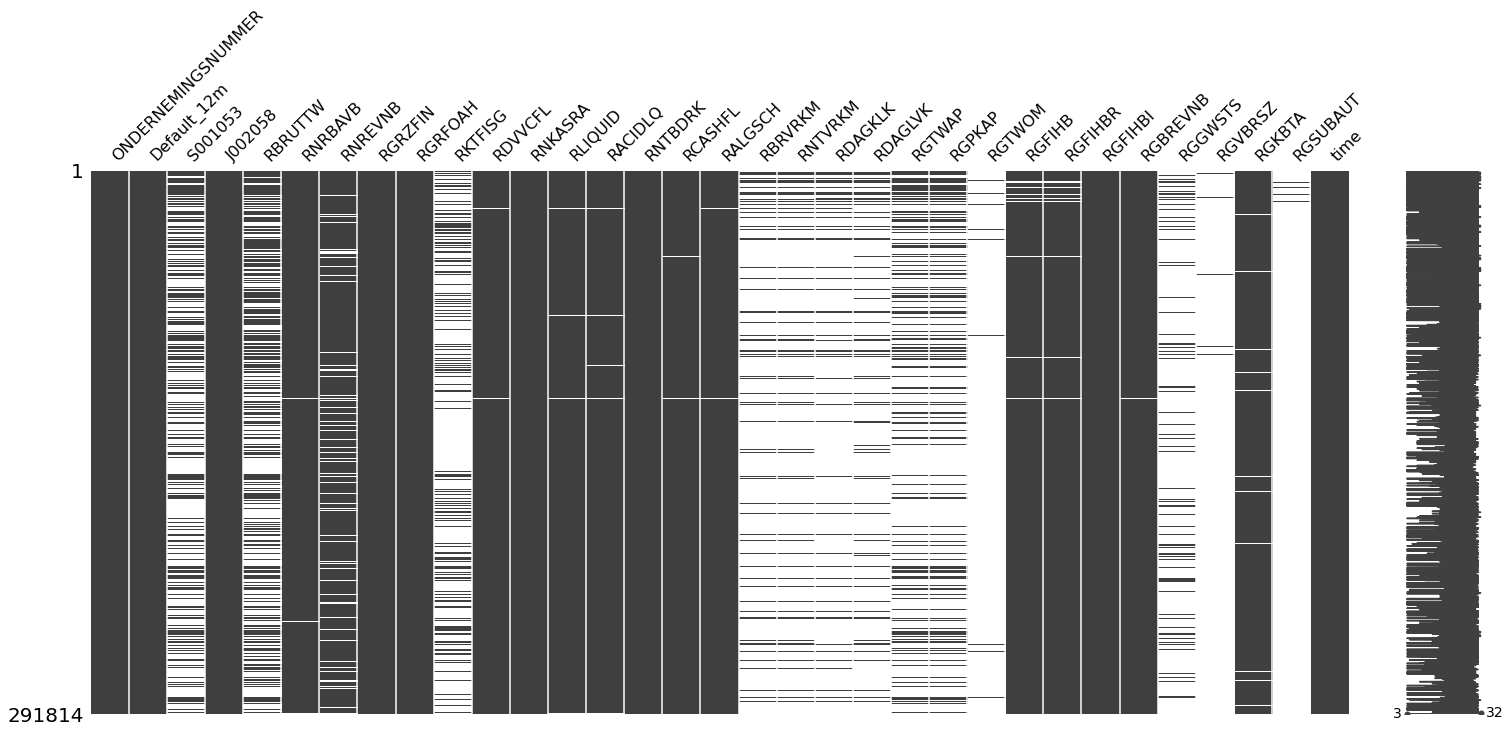

In [268]:
# check missing values
print(fin.isna().sum()/294970)

import missingno as msno # pip install missingno
%matplotlib inline
msno.matrix(fin)

In [269]:
#drop the raw which target = NA
fin[fin.Default_12m.isna()]

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time
219898,876416180,NaN,1.6,1298732.0,171.95,37.25,10.19,14.92,33.33,NaN,...,NaN,3.00021,1.0,3.00021,0.15783,NaN,NaN,0.87847,NaN,18


In [270]:
fin.drop([219898], inplace=True)

In [271]:
fin[fin.Default_12m.isna()]

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,RGTWOM,RGFIHB,RGFIHBR,RGFIHBI,RGBREVNB,RGGWSTS,RGVBRSZ,RGKBTA,RGSUBAUT,time


In [272]:
#compute missing ratio
fin_na = (fin.isnull().sum()/len(fin))*100
fin_na = fin_na.drop(fin_na[fin_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : fin_na})
missing_data.head(20)

,Missing Ratio
RGSUBAUT,99.484259
RGVBRSZ,99.136091
RGTWOM,98.808484
RDAGKLK,89.991878
RNTVRKM,88.704753
RBRVRKM,88.684877
RDAGLVK,88.416897
RGGWSTS,86.587643
RKTFISG,76.840991
RGPKAP,73.070768


Text(0.5, 1.0, 'Percent missing data by feature')

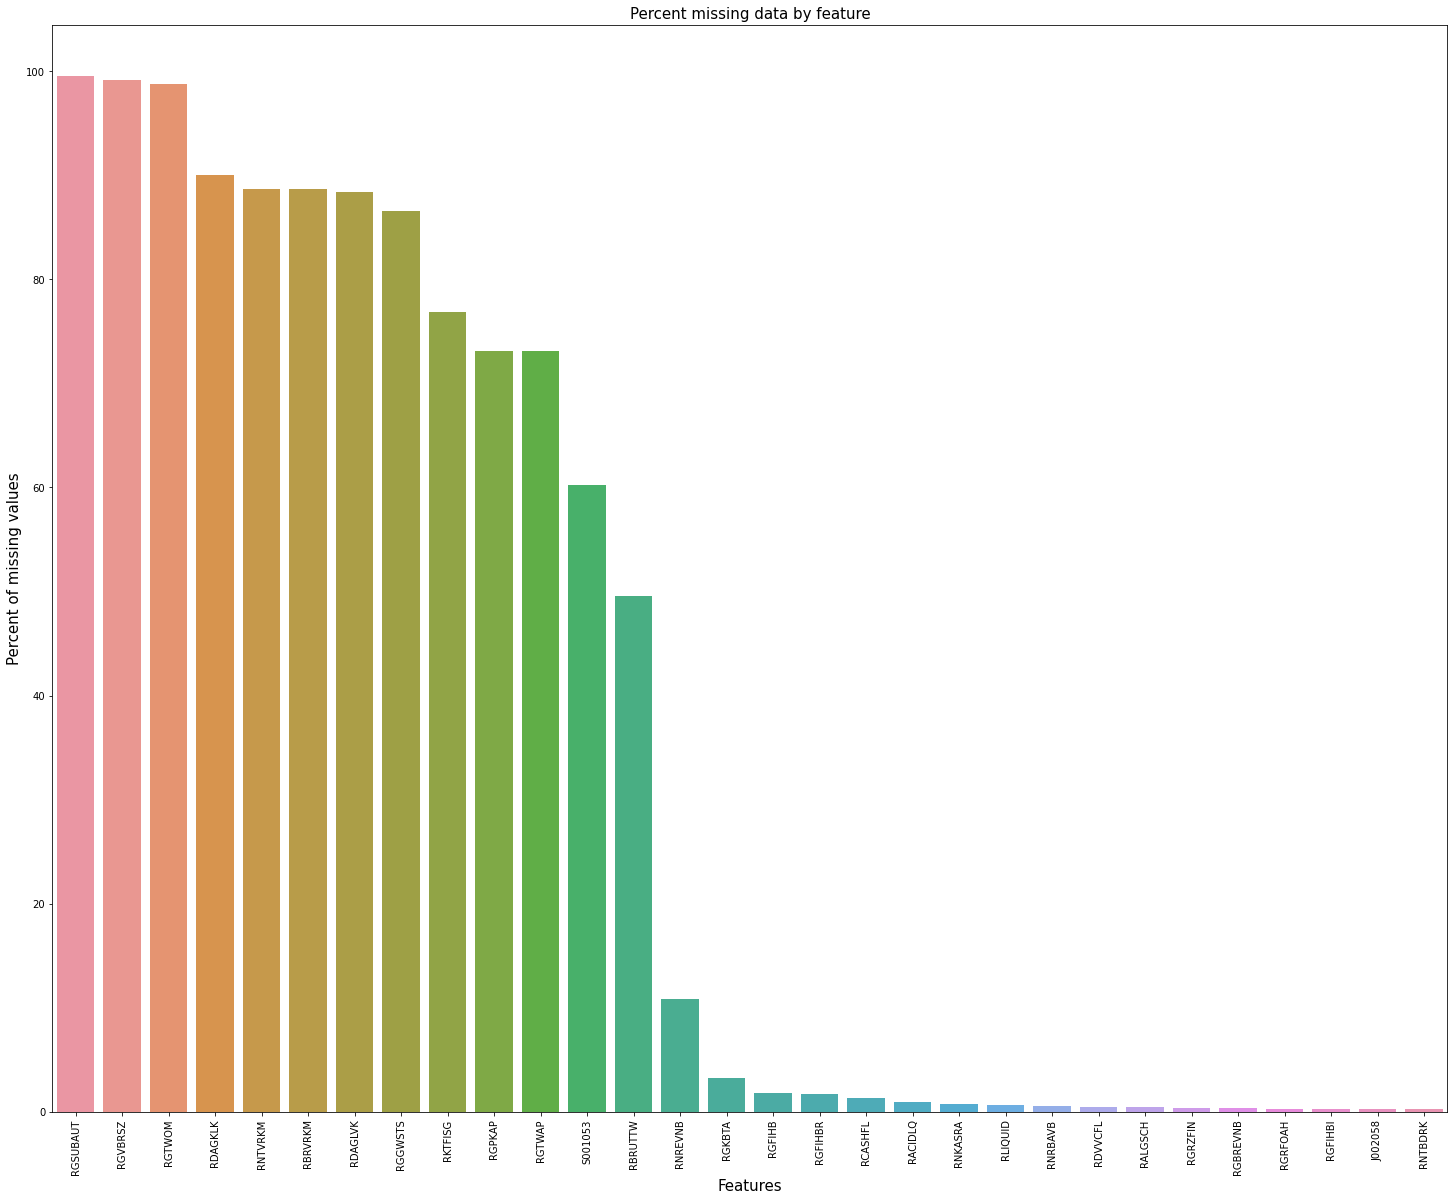

In [273]:
# Missing rate of features with missing values
f, axis = plt.subplots(figsize=(25,20))
plt.xticks(rotation='90')
sns.barplot(x=fin_na.index, y=fin_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [274]:
#If there is a missing value, create a new column "is missing", replace the missing value with the average value, 
#and winsorize all numerical variables

In [275]:
def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[f"fl_{variable}_is_missing"] = where(inDataSet[variable].isnull(), 1, 0)
    inDataSet[variable] = inDataSet[variable].replace({nan: inDataSet[variable].mean()})
    inDataSet[variable] = winsorize(array(inDataSet[variable].astype(float)), limits = [0.00, 0.01])
    return inDataSet

In [276]:
for column in fin:
    if column not in ['ONDERNEMINGSNUMMER','Default_12m','time']:
        fin = treatContinuous(variable = column, inDataSet = fin)

In [277]:
fin

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,fl_RGPKAP_is_missing,fl_RGTWOM_is_missing,fl_RGFIHB_is_missing,fl_RGFIHBR_is_missing,fl_RGFIHBI_is_missing,fl_RGBREVNB_is_missing,fl_RGGWSTS_is_missing,fl_RGVBRSZ_is_missing,fl_RGKBTA_is_missing,fl_RGSUBAUT_is_missing
0,200065765,0.0,22.000000,35969781.0,555.010000,17.60,55.120000,14.03,17.42,21.049991,...,0,0,0,0,0,0,0,1,0,1
1,200068636,0.0,100.400000,35969781.0,289.850000,2.02,1.750000,8.37,54.82,30.000000,...,0,0,0,0,0,0,0,1,0,1
2,200305493,0.0,45.500000,35969781.0,123.750000,0.64,0.580000,12.28,68.20,21.049991,...,0,0,0,0,0,0,1,1,0,1
3,200362210,0.0,100.400000,35969781.0,209.950000,3.78,3.860000,16.07,33.69,17.380000,...,0,0,0,0,0,0,1,0,0,1
4,200762878,0.0,100.400000,7659361.0,104.620000,1.81,1.340000,40.20,47.08,21.049991,...,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,18.845083,65751.0,284.778095,-22.68,15.994681,-35.85,-4.67,21.049991,...,1,1,0,0,0,0,1,1,0,1
44683,899989853,0.0,18.845083,123028.0,284.778095,10.53,-13.490000,41.51,46.55,21.049991,...,1,1,0,0,0,0,1,1,0,1
44684,899991536,0.0,18.845083,93679.0,284.778095,-4.98,-4.980000,59.64,72.87,21.049991,...,1,1,0,0,0,0,1,1,0,1
44685,899992427,0.0,2.800000,3651830.0,999.990000,36.82,36.080000,55.92,56.42,21.049991,...,0,1,0,0,0,0,0,1,0,1


In [278]:
#read jobs data set

In [279]:
jobs=read_csv("jobs_1801_1907.csv",encoding="Latin-1")

C:\tools\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [280]:
jobs.head()

,Unnamed: 0,KBONR,FUNCTIE,ERVARING,DIMENSIE1,maand,naam_tussenpersoon,beroep,beroepsgroep,gemeente,...,naam_vestiging,adres_vestiging,nr_vestiging,busnr_vestiging,postnr_vestiging,cirgroep_l,NISCODE,naceom_2003,nace_code_2008,nace_code_omschr_2008
0,1,2.398432e+08,AGENT COMMERCIAL,1. <6 maand,04. 10 - 19 WN,1904,ACTIRIS,AD3170 Productmanager,AD Leidinggevenden,99999 Buiten Vlaanderen,...,MAROC HOTELS,PLACE DE BROUCKERE,46 48,NaN,1000,Interregionale mobiliteit,21004.0,7450 Selectie en terbeschikkingstelling van pe...,NaN,NaN
1,2,2.398432e+08,COMMUNICATIONS MANAGER (m/w),3. + 2jaar,04. 10 - 19 WN,1904,ACTIRIS,CC3110 Verantwoordelijke externe communicatie,CC Specialisten kennisbeheer en communicatie,99999 Buiten Vlaanderen,...,CEMBUREAU ASSOCIATION EUROPEENNE DU,RUE D'ARLON,55,NaN,1040,Interregionale mobiliteit,21004.0,7450 Selectie en terbeschikkingstelling van pe...,NaN,NaN
2,3,NaN,Assistant administration,2. 6m - 2j,03. 5 - 9 WN,1810,NaN,AC1310 Administratief medewerker,AC Algemeen administratief medewerkers,99999 Buiten Vlaanderen,...,ALL NIPPON AIRWAYS CO LTD,AVENUE LOUISE,285,NaN,1050,Normaal Economisch Circuit zonder Uitzendopdra...,21004.0,6210 Luchtvaart volgens dienstregeling,NaN,NaN
3,4,2.398432e+08,Center Director (m/w),3. + 2jaar,04. 10 - 19 WN,1810,ACTIRIS,CD3220 Onderzoeker exacte wetenschappen,CD Onderzoekers en experten studiedienst,99999 Buiten Vlaanderen,...,COUNCIL,LOUIZALAAN,149,18,1050,Interregionale mobiliteit,21004.0,7450 Selectie en terbeschikkingstelling van pe...,NaN,NaN
4,5,2.102078e+09,Executive assistant (h/f),3. + 2jaar,06. 50 - 99 WN,1905,UNIQUE OFFICE ARTS,AC1310 Administratief medewerker,AC Algemeen administratief medewerkers,99999 Buiten Vlaanderen,...,THE OIL INDUSTRY INTERNATIONAL EXPL,BLD DU SOUVERAIN,165,NaN,1160,Uitzendopdrachten,21004.0,7450 Selectie en terbeschikkingstelling van pe...,NaN,NaN


In [281]:
#Get the years information

In [282]:
jobs['maand'] = jobs['maand'].astype(str)

In [283]:
jobs['year'] = jobs['maand'].str[0:2]

In [284]:
jobs.year.unique()

array(['19', '18'], dtype=object)

In [285]:
jobs['year'] = jobs.year.astype(int)

Unnamed: 0               0.000000
KBONR                    0.319831
FUNCTIE                  0.000000
ERVARING                 0.000000
DIMENSIE1                0.000000
maand                    0.000000
naam_tussenpersoon       0.502869
beroep                   0.000000
beroepsgroep             0.000000
gemeente                 0.000000
regio                    0.000000
arrondissement           0.000000
provincie                0.000000
resoc                    0.000000
serr                     0.000000
circuit                  0.000000
streektafel              0.875414
ontvangen                0.000000
studieniveau_basis       0.000000
studieniveau_detail      0.000000
vol_deel                 0.000000
tijdsreg                 0.000000
talen                    0.000000
btwnr                    0.000000
rsznr                    0.208263
ondernemingsnummer       0.000558
KBONRH                   0.000108
KBONRF                   0.027019
naam_vestiging           0.000000
adres_vestigin

<AxesSubplot:>

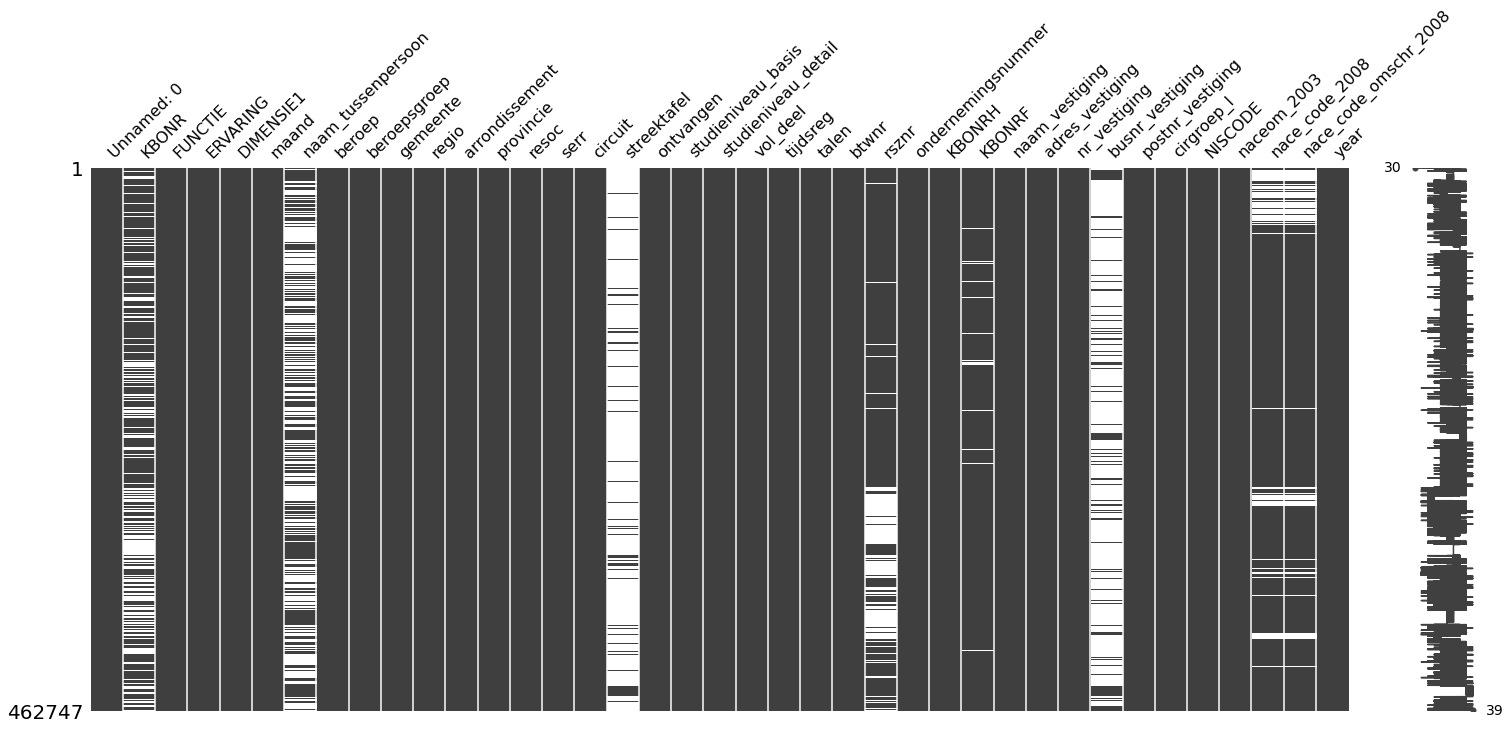

In [286]:
# check missing values
print(jobs.isna().sum()/462747)

import missingno as msno # pip install missingno
%matplotlib inline
msno.matrix(jobs)

In [287]:
#Delete unwanted columns

In [288]:
jobs = jobs.drop('KBONR',axis=1)
jobs = jobs.drop('FUNCTIE',axis=1)
jobs = jobs.drop('ERVARING',axis=1)
jobs = jobs.drop('DIMENSIE1',axis=1)
jobs = jobs.drop('maand',axis=1)
jobs = jobs.drop('naam_tussenpersoon',axis=1)
jobs = jobs.drop('beroepsgroep',axis=1)
jobs = jobs.drop('studieniveau_detail',axis=1)
jobs = jobs.drop('rsznr',axis=1)
jobs = jobs.drop('ondernemingsnummer',axis=1)
jobs = jobs.drop('KBONRH',axis=1)
jobs = jobs.drop('KBONRF',axis=1)
jobs = jobs.drop('naam_vestiging',axis=1)
jobs = jobs.drop('adres_vestiging',axis=1)
jobs = jobs.drop('nr_vestiging',axis=1)
jobs = jobs.drop('postnr_vestiging',axis=1)
jobs = jobs.drop('nace_code_omschr_2008',axis=1)
jobs = jobs.drop('regio',axis=1)
jobs = jobs.drop('arrondissement',axis=1)
jobs = jobs.drop('gemeente',axis=1)
jobs = jobs.drop('resoc',axis=1)
jobs = jobs.drop('serr',axis=1)
jobs = jobs.drop('NISCODE',axis=1)
jobs = jobs.drop('naceom_2003',axis=1)
jobs = jobs.drop('streektafel',axis=1)
jobs = jobs.drop('busnr_vestiging',axis=1)
jobs = jobs.drop("Unnamed: 0", axis=1)
jobs = jobs.drop('nace_code_2008',axis=1)

In [289]:
#Create a new column based on whether the "beroep" column is manager or not

In [290]:
jobs = pysqldf("""
select *,
CASE WHEN beroep LIKE "%manager%" THEN 'manager'
ELSE 'not_manager' END as manager
from jobs
""")

In [291]:
jobs = jobs.drop("beroep", axis=1)

In [292]:
jobs

,provincie,circuit,ontvangen,studieniveau_basis,vol_deel,tijdsreg,talen,btwnr,cirgroep_l,year,manager
0,9 Buiten Vlaanderen,T tijdelijk,1,00 Geen specifieke studievereiste,voltijds,dagwerk,tweetalig,411621973,Interregionale mobiliteit,19,manager
1,9 Buiten Vlaanderen,G gewoon,1,00 Geen specifieke studievereiste,voltijds,dagwerk,tweetalig,454355324,Interregionale mobiliteit,19,not_manager
2,9 Buiten Vlaanderen,G gewoon,1,02 Middengeschoold,voltijds,dagwerk,tweetalig,440997929,Normaal Economisch Circuit zonder Uitzendopdra...,18,not_manager
3,9 Buiten Vlaanderen,G gewoon,1,00 Geen specifieke studievereiste,voltijds,dagwerk,tweetalig,467231776,Interregionale mobiliteit,18,not_manager
4,9 Buiten Vlaanderen,I uitzendopdrachten,1,03 Hooggeschoold,voltijds,dagwerk,tweetalig,448554031,Uitzendopdrachten,19,not_manager
...,...,...,...,...,...,...,...,...,...,...,...
462742,3 West-Vlaanderen,IV uitzendopdr. optie vast werk,1,02 Middengeschoold,voltijds,2-ploegen,eentalig,840995839,Uitzendopdrachten,19,not_manager
462743,3 West-Vlaanderen,IV uitzendopdr. optie vast werk,1,02 Middengeschoold,voltijds,2-ploegen,eentalig,840995839,Uitzendopdrachten,19,not_manager
462744,3 West-Vlaanderen,IV uitzendopdr. optie vast werk,1,02 Middengeschoold,voltijds,2-ploegen,eentalig,840995839,Uitzendopdrachten,19,not_manager
462745,3 West-Vlaanderen,IV uitzendopdr. optie vast werk,1,02 Middengeschoold,voltijds,2-ploegen,eentalig,840995839,Uitzendopdrachten,19,not_manager


In [293]:
jobs.columns.tolist()

['provincie',
 'circuit',
 'ontvangen',
 'studieniveau_basis',
 'vol_deel',
 'tijdsreg',
 'talen',
 'btwnr',
 'cirgroep_l',
 'year',
 'manager']

In [294]:
jobs_columns = ['provincie',
 'circuit',
 'ontvangen',
 'studieniveau_basis',
 'vol_deel',
 'tijdsreg',
 'talen',
 'cirgroep_l',
 'manager']

In [295]:
#Using dummy to all Categorical vars and drop the original columns, creating new columns "is missing" for all Continuous vars
#with missing value, using mean value to replace the missing value.

In [296]:
types = jobs.dtypes.to_dict()

In [297]:
def treatCategorical (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[variable] = inDataSet[variable].replace({nan: "missing"})
    inDataSet           = inDataSet.join(get_dummies(inDataSet[variable], prefix = f"fl_{variable}_is", drop_first = True))
    inDataSet           = inDataSet.drop(columns=[variable])
    return inDataSet
def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[f"fl_{variable}_is_missing"] = where(inDataSet[variable].isnull(), 1, 0)
    inDataSet[variable] = inDataSet[variable].replace({nan: inDataSet[variable].mean()})

    return inDataSet

In [298]:
for column in jobs[jobs_columns]:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        jobs = treatContinuous(variable = column, inDataSet = jobs)
    else:
        jobs = treatCategorical(variable = column, inDataSet = jobs)

provincie : object
circuit : object
ontvangen : int64
studieniveau_basis : object
vol_deel : object
tijdsreg : object
talen : object
cirgroep_l : object
manager : object


In [299]:
jobs

,ontvangen,btwnr,year,fl_provincie_is_2 Vlaams-Brabant,fl_provincie_is_3 West-Vlaanderen,fl_provincie_is_4 Oost-Vlaanderen,fl_provincie_is_7 Limburg,fl_provincie_is_9 Buiten Vlaanderen,fl_circuit_is_CM collectief maatwerk,fl_circuit_is_DA DAC,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,1,411621973,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,454355324,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,440997929,18,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,467231776,18,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,448554031,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462742,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
462743,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
462744,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
462745,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [300]:
#Based on years, split the data to 2 new data set

In [301]:
jobs_18 = jobs[jobs['year'] == 18]

In [302]:
jobs_18

,ontvangen,btwnr,year,fl_provincie_is_2 Vlaams-Brabant,fl_provincie_is_3 West-Vlaanderen,fl_provincie_is_4 Oost-Vlaanderen,fl_provincie_is_7 Limburg,fl_provincie_is_9 Buiten Vlaanderen,fl_circuit_is_CM collectief maatwerk,fl_circuit_is_DA DAC,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
2,1,440997929,18,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,467231776,18,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10,1,850507777,18,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
12,1,850507777,18,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
15,1,850507777,18,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462725,1,840995839,18,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
462729,1,840995839,18,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
462730,1,840995839,18,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
462736,5,840995839,18,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [303]:
jobs_19 = jobs[jobs['year'] == 19]

In [304]:
jobs_19

,ontvangen,btwnr,year,fl_provincie_is_2 Vlaams-Brabant,fl_provincie_is_3 West-Vlaanderen,fl_provincie_is_4 Oost-Vlaanderen,fl_provincie_is_7 Limburg,fl_provincie_is_9 Buiten Vlaanderen,fl_circuit_is_CM collectief maatwerk,fl_circuit_is_DA DAC,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,1,411621973,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,454355324,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,448554031,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,1,451751665,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
6,1,451751665,19,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462741,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
462742,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
462743,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
462744,1,840995839,19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [305]:
jobs_18 = jobs_18.drop('year',axis = 1)

In [306]:
jobs_19 = jobs_19.drop('year',axis = 1)

In [307]:
#get sum group by 'btwnr',reduce raw of basetable

In [308]:
jobs_18 = jobs_18.groupby("btwnr").sum()

In [309]:
jobs_18

,ontvangen,fl_provincie_is_2 Vlaams-Brabant,fl_provincie_is_3 West-Vlaanderen,fl_provincie_is_4 Oost-Vlaanderen,fl_provincie_is_7 Limburg,fl_provincie_is_9 Buiten Vlaanderen,fl_circuit_is_CM collectief maatwerk,fl_circuit_is_DA DAC,fl_circuit_is_FS federale instapstage,fl_circuit_is_G gewoon,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
btwnr,,,,,,,,,,,,,,,,,,,,,
400019486,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
400032156,16,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,13.0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
400039084,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
400059078,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
400067887,6,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923018643,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
923971520,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
923971718,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [310]:
jobs_19 = jobs_19.groupby("btwnr").sum()

In [311]:
jobs_19

,ontvangen,fl_provincie_is_2 Vlaams-Brabant,fl_provincie_is_3 West-Vlaanderen,fl_provincie_is_4 Oost-Vlaanderen,fl_provincie_is_7 Limburg,fl_provincie_is_9 Buiten Vlaanderen,fl_circuit_is_CM collectief maatwerk,fl_circuit_is_DA DAC,fl_circuit_is_FS federale instapstage,fl_circuit_is_G gewoon,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
btwnr,,,,,,,,,,,,,,,,,,,,,
400000977,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
400008994,10,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,10.0
400010875,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
400017112,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
400019486,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933392495,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
939289996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
941792893,5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0


In [312]:
fin_18 = fin[fin['time'] == 18]

In [313]:
fin_19 = fin[fin['time'] == 19]

In [314]:
#merge data set,fin18 & jobs18, fin19 & jobs19

In [315]:
fin_jobs_18 = pd.merge(fin_18, jobs_18, how = 'left' ,left_on=["ONDERNEMINGSNUMMER"], right_on=["btwnr"])

In [316]:
fin_jobs_18

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,200065765,0.0,22.000000,35969781.0,555.010000,17.60,55.12,14.03,17.42,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200068636,0.0,100.400000,35969781.0,289.850000,2.02,1.75,8.37,54.82,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200305493,0.0,45.500000,35969781.0,123.750000,0.64,0.58,12.28,68.20,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200362210,0.0,100.400000,35969781.0,209.950000,3.78,3.86,16.07,33.69,17.380000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200762878,0.0,100.400000,7659361.0,104.620000,1.81,1.34,40.20,47.08,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247121,899995692,0.0,18.845083,277630.0,284.778095,33.78,10.64,86.61,93.29,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247122,899996088,0.0,18.845083,312452.0,284.778095,6.92,12.52,15.17,17.15,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247123,899997375,0.0,1.900000,1127703.0,153.050000,-9.53,-53.51,-35.35,22.55,38.790000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
247124,899998167,0.0,2.700000,200073.0,226.490000,92.93,205.89,20.47,23.57,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
fin_jobs_19 = pd.merge(fin_19, jobs_19, how = 'left' ,left_on=["ONDERNEMINGSNUMMER"], right_on=["btwnr"])

In [318]:
fin_jobs_19

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,204647234,0.0,18.845083,35969781.0,284.778095,1.08,1.150000,10.88,37.41,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,212586683,0.0,80.300000,35969781.0,322.540000,34.88,6.190000,24.35,78.32,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,400008697,0.0,19.800000,2370582.0,177.530000,40.46,33.680000,47.00,49.61,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400029582,0.0,13.700000,4024671.0,203.530000,11.61,33.030000,23.76,27.74,21.049991,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
4,400051754,0.0,15.200000,7201038.0,122.150000,2.59,0.920000,42.46,50.04,4.580000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,18.845083,65751.0,284.778095,-22.68,15.994681,-35.85,-4.67,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44683,899989853,0.0,18.845083,123028.0,284.778095,10.53,-13.490000,41.51,46.55,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44684,899991536,0.0,18.845083,93679.0,284.778095,-4.98,-4.980000,59.64,72.87,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44685,899992427,0.0,2.800000,3651830.0,999.990000,36.82,36.080000,55.92,56.42,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
#concat 2 data set

In [320]:
fin_jobs = pd.concat([fin_jobs_18,fin_jobs_19])

In [321]:
fin_jobs

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,200065765,0.0,22.000000,35969781.0,555.010000,17.60,55.120000,14.03,17.42,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200068636,0.0,100.400000,35969781.0,289.850000,2.02,1.750000,8.37,54.82,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200305493,0.0,45.500000,35969781.0,123.750000,0.64,0.580000,12.28,68.20,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,200362210,0.0,100.400000,35969781.0,209.950000,3.78,3.860000,16.07,33.69,17.380000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200762878,0.0,100.400000,7659361.0,104.620000,1.81,1.340000,40.20,47.08,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,18.845083,65751.0,284.778095,-22.68,15.994681,-35.85,-4.67,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44683,899989853,0.0,18.845083,123028.0,284.778095,10.53,-13.490000,41.51,46.55,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44684,899991536,0.0,18.845083,93679.0,284.778095,-4.98,-4.980000,59.64,72.87,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44685,899992427,0.0,2.800000,3651830.0,999.990000,36.82,36.080000,55.92,56.42,21.049991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
#compute missing ratio
fin_jobs_na = (fin_jobs.isnull().sum()/len(fin))*100
fin_jobs_na = fin_jobs_na.drop(fin_jobs_na[fin_jobs_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : fin_jobs_na})
missing_data.head(20)

,Missing Ratio
fl_manager_is_not_manager,93.791915
fl_circuit_is_IV uitzendopdr. optie vast werk,93.791915
fl_circuit_is_Vl. Overheid: statutair,93.791915
fl_circuit_is_Vl. Overheid: contract onbep. duur,93.791915
fl_circuit_is_Vl. Overheid: contract bep. duur,93.791915
fl_circuit_is_VU vaste job bij uitzendkantoor,93.791915
fl_circuit_is_V studentenjob,93.791915
fl_circuit_is_TV tijdelijke job met optie vast werk,93.791915
fl_circuit_is_T tijdelijk,93.791915
fl_circuit_is_Q vervanging SWT,93.791915


In [323]:
#Using mean value to repalce the missing value

In [324]:
def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[variable] = inDataSet[variable].replace({nan: inDataSet[variable].mean()})
    return inDataSet

In [325]:
for column in fin_jobs.columns:
    if column in fin_jobs.columns:
        fin_jobs = treatContinuous(variable = column, inDataSet = fin_jobs)

In [326]:
fin_jobs

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,200065765,0.0,22.000000,35969781.0,555.010000,17.60,55.120000,14.03,17.42,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
1,200068636,0.0,100.400000,35969781.0,289.850000,2.02,1.750000,8.37,54.82,30.000000,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
2,200305493,0.0,45.500000,35969781.0,123.750000,0.64,0.580000,12.28,68.20,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
3,200362210,0.0,100.400000,35969781.0,209.950000,3.78,3.860000,16.07,33.69,17.380000,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
4,200762878,0.0,100.400000,7659361.0,104.620000,1.81,1.340000,40.20,47.08,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,18.845083,65751.0,284.778095,-22.68,15.994681,-35.85,-4.67,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
44683,899989853,0.0,18.845083,123028.0,284.778095,10.53,-13.490000,41.51,46.55,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
44684,899991536,0.0,18.845083,93679.0,284.778095,-4.98,-4.980000,59.64,72.87,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
44685,899992427,0.0,2.800000,3651830.0,999.990000,36.82,36.080000,55.92,56.42,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541


In [327]:
#check whether there is any missing value

In [328]:
fin_jobs.isna().sum()

ONDERNEMINGSNUMMER                                      0
Default_12m                                             0
S001053                                                 0
J002058                                                 0
RBRUTTW                                                 0
                                                       ..
fl_cirgroep_l_is_Tewerkstellingsmaatregelen             0
fl_cirgroep_l_is_Uitzendopdrachten                      0
fl_cirgroep_l_is_Werfreserve, spontane sollicitaties    0
fl_cirgroep_l_is_Zelfstandige activiteit                0
fl_manager_is_not_manager                               0
Length: 117, dtype: int64

In [329]:
fin_jobs

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,200065765,0.0,22.000000,35969781.0,555.010000,17.60,55.120000,14.03,17.42,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
1,200068636,0.0,100.400000,35969781.0,289.850000,2.02,1.750000,8.37,54.82,30.000000,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
2,200305493,0.0,45.500000,35969781.0,123.750000,0.64,0.580000,12.28,68.20,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
3,200362210,0.0,100.400000,35969781.0,209.950000,3.78,3.860000,16.07,33.69,17.380000,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
4,200762878,0.0,100.400000,7659361.0,104.620000,1.81,1.340000,40.20,47.08,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,18.845083,65751.0,284.778095,-22.68,15.994681,-35.85,-4.67,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
44683,899989853,0.0,18.845083,123028.0,284.778095,10.53,-13.490000,41.51,46.55,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
44684,899991536,0.0,18.845083,93679.0,284.778095,-4.98,-4.980000,59.64,72.87,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541
44685,899992427,0.0,2.800000,3651830.0,999.990000,36.82,36.080000,55.92,56.42,21.049991,...,5.158147,0.712906,0.072643,0.010598,0.058567,0.000442,2.133308,0.000718,0.008666,8.200541


In [330]:
fin_jobs.columns.tolist()

['ONDERNEMINGSNUMMER',
 'Default_12m',
 'S001053',
 'J002058',
 'RBRUTTW',
 'RNRBAVB',
 'RNREVNB',
 'RGRZFIN',
 'RGRFOAH',
 'RKTFISG',
 'RDVVCFL',
 'RNKASRA',
 'RLIQUID',
 'RACIDLQ',
 'RNTBDRK',
 'RCASHFL',
 'RALGSCH',
 'RBRVRKM',
 'RNTVRKM',
 'RDAGKLK',
 'RDAGLVK',
 'RGTWAP',
 'RGPKAP',
 'RGTWOM',
 'RGFIHB',
 'RGFIHBR',
 'RGFIHBI',
 'RGBREVNB',
 'RGGWSTS',
 'RGVBRSZ',
 'RGKBTA',
 'RGSUBAUT',
 'time',
 'fl_S001053_is_missing',
 'fl_J002058_is_missing',
 'fl_RBRUTTW_is_missing',
 'fl_RNRBAVB_is_missing',
 'fl_RNREVNB_is_missing',
 'fl_RGRZFIN_is_missing',
 'fl_RGRFOAH_is_missing',
 'fl_RKTFISG_is_missing',
 'fl_RDVVCFL_is_missing',
 'fl_RNKASRA_is_missing',
 'fl_RLIQUID_is_missing',
 'fl_RACIDLQ_is_missing',
 'fl_RNTBDRK_is_missing',
 'fl_RCASHFL_is_missing',
 'fl_RALGSCH_is_missing',
 'fl_RBRVRKM_is_missing',
 'fl_RNTVRKM_is_missing',
 'fl_RDAGKLK_is_missing',
 'fl_RDAGLVK_is_missing',
 'fl_RGTWAP_is_missing',
 'fl_RGPKAP_is_missing',
 'fl_RGTWOM_is_missing',
 'fl_RGFIHB_is_missing',
 

In [331]:
#Select the features which need to do normalizer

In [332]:
normalizer_features = [ 'S001053',
 'J002058',
 'RBRUTTW',
 'RNRBAVB',
 'RNREVNB',
 'RGRZFIN',
 'RGRFOAH',
 'RKTFISG',
 'RDVVCFL',
 'RNKASRA',
 'RLIQUID',
 'RACIDLQ',
 'RNTBDRK',
 'RCASHFL',
 'RALGSCH',
 'RBRVRKM',
 'RNTVRKM',
 'RDAGKLK',
 'RDAGLVK',
 'RGTWAP',
 'RGPKAP',
 'RGTWOM',
 'RGFIHB',
 'RGFIHBR',
 'RGFIHBI',
 'RGBREVNB',
 'RGGWSTS',
 'RGVBRSZ',
 'RGKBTA',
 'RGSUBAUT',
 'ontvangen',
 'fl_provincie_is_2 Vlaams-Brabant',
 'fl_provincie_is_3 West-Vlaanderen',
 'fl_provincie_is_4 Oost-Vlaanderen',
 'fl_provincie_is_7 Limburg',
 'fl_provincie_is_9  Buiten Vlaanderen',
 'fl_circuit_is_CM collectief maatwerk',
 'fl_circuit_is_DA DAC',
 'fl_circuit_is_FS federale instapstage',
 'fl_circuit_is_G  gewoon',
 'fl_circuit_is_GB gewoon - beperkte tewerkstelling',
 'fl_circuit_is_GC gewoon dienstencheques',
 'fl_circuit_is_I  uitzendopdrachten',
 'fl_circuit_is_IV uitzendopdr. optie vast werk',
 'fl_circuit_is_LD lokale diensteneconomie',
 'fl_circuit_is_LP leerplek',
 'fl_circuit_is_MO middenstandsopleiding',
 'fl_circuit_is_Q  vervanging SWT',
 'fl_circuit_is_T  tijdelijk',
 'fl_circuit_is_TV tijdelijke job met optie vast werk',
 'fl_circuit_is_V  studentenjob',
 'fl_circuit_is_VU vaste job bij uitzendkantoor',
 'fl_circuit_is_Vl. Overheid: contract bep. duur',
 'fl_circuit_is_Vl. Overheid: contract onbep. duur',
 'fl_circuit_is_Vl. Overheid: statutair',
 'fl_circuit_is_Vl. Overheid: voorbehouden PMAB',
 'fl_circuit_is_WS werfreserve, spont. sollicitatie',
 'fl_circuit_is_Z  zelfstandige',
 'fl_ontvangen_is_missing',
 'fl_studieniveau_basis_is_01 Kortgeschoold',
 'fl_studieniveau_basis_is_02 Middengeschoold',
 'fl_studieniveau_basis_is_03 Hooggeschoold',
 'fl_vol_deel_is_voltijds',
 'fl_tijdsreg_is_3-ploegen',
 'fl_tijdsreg_is_dagwerk',
 'fl_tijdsreg_is_nachtwerk',
 'fl_tijdsreg_is_onbekend',
 'fl_tijdsreg_is_onderbroken',
 'fl_tijdsreg_is_volcontinu',
 'fl_tijdsreg_is_weekendwerk',
 'fl_talen_is_eentalig',
 'fl_talen_is_tweetalig',
 'fl_talen_is_viertalig',
 'fl_talen_is_vijftalig',
 'fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld',
 'fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren',
 'fl_cirgroep_l_is_Partners, overgenomen databanken',
 'fl_cirgroep_l_is_Restgroep',
 'fl_cirgroep_l_is_Studentenjobs',
 'fl_cirgroep_l_is_Tewerkstellingsmaatregelen',
 'fl_cirgroep_l_is_Uitzendopdrachten',
 'fl_cirgroep_l_is_Werfreserve, spontane sollicitaties',
 'fl_cirgroep_l_is_Zelfstandige activiteit',
 'fl_manager_is_not_manager']

In [333]:
#Do normalizer

In [334]:
from sklearn.preprocessing import MinMaxScaler
# Build the normalizer on train
for v in fin_jobs[normalizer_features]:
        scaler = MinMaxScaler().fit(fin_jobs[[v]])
        # Apply on train, test
        fin_jobs[v] = scaler.transform(fin_jobs[[v]])

In [335]:
fin_jobs

,ONDERNEMINGSNUMMER,Default_12m,S001053,J002058,RBRUTTW,RNRBAVB,RNREVNB,RGRZFIN,RGRFOAH,RKTFISG,...,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld,fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren,"fl_cirgroep_l_is_Partners, overgenomen databanken",fl_cirgroep_l_is_Restgroep,fl_cirgroep_l_is_Studentenjobs,fl_cirgroep_l_is_Tewerkstellingsmaatregelen,fl_cirgroep_l_is_Uitzendopdrachten,"fl_cirgroep_l_is_Werfreserve, spontane sollicitaties",fl_cirgroep_l_is_Zelfstandige activiteit,fl_manager_is_not_manager
0,200065765,0.0,0.218345,1.000000,0.777508,0.693674,0.836498,0.927638,0.925839,0.306214,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
1,200068636,0.0,1.000000,1.000000,0.644926,0.683051,0.794180,0.922460,0.959909,0.436472,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
2,200305493,0.0,0.452642,1.000000,0.561876,0.682110,0.793252,0.926037,0.972097,0.306214,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
3,200362210,0.0,1.000000,1.000000,0.604976,0.684251,0.795853,0.929505,0.940660,0.252802,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
4,200762878,0.0,1.000000,0.212939,0.552311,0.682908,0.793855,0.951579,0.952858,0.306214,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,899988071,0.0,0.186890,0.001828,0.642390,0.666210,0.805475,0.882007,0.905716,0.306214,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
44683,899989853,0.0,0.186890,0.003420,0.642390,0.688853,0.782096,0.952777,0.952375,0.306214,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
44684,899991536,0.0,0.186890,0.002604,0.642390,0.678278,0.788844,0.969363,0.976352,0.306214,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672
44685,899992427,0.0,0.026919,0.101525,1.000000,0.706779,0.821401,0.965960,0.961366,0.306214,...,0.004014,0.000281,0.000167,0.000174,0.001464,0.000074,0.000494,0.00009,0.000075,0.001672


In [336]:
#Based on the years, we split fin_jobs data set to trainingSet(2018) and testSet(2019)

In [337]:
trainingSet = fin_jobs[fin_jobs['time'] == 18]
testSet     = fin_jobs[fin_jobs['time'] == 19]

In [338]:
#Delete time column in the 3 tables

In [339]:
trainingSet = trainingSet.drop('time',axis = 1)
testSet = testSet.drop('time',axis = 1)
fin_jobs = fin_jobs.drop('time',axis = 1)

In [340]:
#Transform ONDERNEMINGSNUMMER, Default_12m to int,other features to float

In [341]:
for col in fin_jobs.columns:
    if col not in ['ONDERNEMINGSNUMMER','Default_12m']:
        fin_jobs[col] = fin_jobs[col].astype(float)
    else:
        fin_jobs[col] = fin_jobs[col].astype(int)

In [342]:
for col in trainingSet.columns:
    if col not in ['ONDERNEMINGSNUMMER','Default_12m']:
        trainingSet[col] = trainingSet[col].astype(float)
    else:
        trainingSet[col] = trainingSet[col].astype(int)

In [343]:
for col in testSet.columns:
    if col not in ['ONDERNEMINGSNUMMER','Default_12m']:
        testSet[col] = testSet[col].astype(float)
    else:
        testSet[col] = testSet[col].astype(int)

In [344]:
#check the correlation coefficient of each variable

In [218]:
import seaborn as sns
corr2 = fin_jobs.corr()#The correlation coefficient of each variable was calculated

In [219]:
corr2.to_csv("corr_fin_jobs_5.26.csv",index=False)

In [ ]:
#Manually delete one of the variables with correlation greater than 0.8

In [345]:
variables = ['ONDERNEMINGSNUMMER',
'Default_12m',
'S001053',
'J002058',
'RBRUTTW',
'RNRBAVB',
'RNREVNB',
'RKTFISG',
'RDVVCFL',
'RNKASRA',
'RACIDLQ',
'RNTBDRK',
'RCASHFL',
'RALGSCH',
'RNTVRKM',
'RDAGKLK',
'RDAGLVK',
'RGTWAP',
'RGPKAP',
'RGTWOM',
'RGFIHBR',
'RGFIHBI',
'RGBREVNB',
'RGGWSTS',
'RGVBRSZ',
'RGKBTA',
'RGSUBAUT',
'fl_RBRUTTW_is_missing',
'fl_RNRBAVB_is_missing',
'fl_RNREVNB_is_missing',
'fl_RKTFISG_is_missing',
'fl_RNKASRA_is_missing',
'fl_RACIDLQ_is_missing',
'fl_RALGSCH_is_missing',
'fl_RDAGLVK_is_missing',
'fl_RGPKAP_is_missing',
'fl_RGTWOM_is_missing',
'fl_RGFIHBR_is_missing',
'fl_RGBREVNB_is_missing',
'fl_RGGWSTS_is_missing',
'fl_RGVBRSZ_is_missing',
'fl_RGKBTA_is_missing',
'fl_RGSUBAUT_is_missing',
'fl_provincie_is_2 Vlaams-Brabant',
'fl_provincie_is_3 West-Vlaanderen',
'fl_provincie_is_4 Oost-Vlaanderen',
'fl_provincie_is_7 Limburg',
'fl_circuit_is_CM collectief maatwerk',
'fl_circuit_is_FS federale instapstage',
'fl_circuit_is_G  gewoon',
'fl_circuit_is_GB gewoon - beperkte tewerkstelling',
'fl_circuit_is_GC gewoon dienstencheques',
'fl_circuit_is_I  uitzendopdrachten',
'fl_circuit_is_MO middenstandsopleiding',
'fl_circuit_is_Q  vervanging SWT',
'fl_circuit_is_T  tijdelijk',
'fl_circuit_is_TV tijdelijke job met optie vast werk',
'fl_circuit_is_VU vaste job bij uitzendkantoor',
'fl_circuit_is_Vl. Overheid: contract bep. duur',
'fl_circuit_is_Vl. Overheid: contract onbep. duur',
'fl_circuit_is_Z  zelfstandige',
'fl_studieniveau_basis_is_01 Kortgeschoold',
'fl_studieniveau_basis_is_03 Hooggeschoold',
'fl_tijdsreg_is_3-ploegen',
'fl_tijdsreg_is_nachtwerk',
'fl_tijdsreg_is_onbekend',
'fl_tijdsreg_is_onderbroken',
'fl_tijdsreg_is_volcontinu',
'fl_tijdsreg_is_weekendwerk',
'fl_talen_is_tweetalig',
'fl_talen_is_viertalig',
'fl_talen_is_vijftalig',
'fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten rechtstreeks aan VDAB gemeld',
'fl_cirgroep_l_is_Normaal Economisch Circuit zonder Uitzendopdrachten via wervings- en selectiekantoren',
'fl_cirgroep_l_is_Partners, overgenomen databanken',
'fl_cirgroep_l_is_Restgroep',
'fl_cirgroep_l_is_Studentenjobs',
'fl_cirgroep_l_is_Tewerkstellingsmaatregelen',
'fl_cirgroep_l_is_Werfreserve, spontane sollicitaties',
'fl_cirgroep_l_is_Zelfstandige activiteit',
'fl_manager_is_not_manager']


In [346]:
#Reselect variables for the three tables

In [347]:
fin_jobs = fin_jobs[variables]
trainingSet = trainingSet[variables]
testSet = testSet[variables]

In [348]:
#fin_jobs.to_csv("fin_jobs0526.csv",index=False)

In [349]:
trainingSetID = trainingSet['ONDERNEMINGSNUMMER'].tolist()
trainingSetTarget = trainingSet['Default_12m'].tolist()
testSetID = testSet['ONDERNEMINGSNUMMER'].tolist()
testSetTarget = testSet['Default_12m'].tolist()

In [350]:
#ID and target are not used as model fitting variables, so they are deleted first

In [351]:
trainingSet_features = trainingSet.drop('Default_12m',axis = 1)
trainingSet_features = trainingSet_features.drop('ONDERNEMINGSNUMMER',axis = 1)

In [352]:
testSet_features = testSet.drop('Default_12m',axis = 1)
testSet_features = testSet_features.drop('ONDERNEMINGSNUMMER',axis = 1)

In [353]:
X = trainingSet_features.values.tolist()
y = trainingSet['Default_12m'].tolist()

In [354]:
#Using SMOTE function to resampling

In [355]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
# Define smote model, random_ State is equivalent to the role of random number seed
smo = SMOTE(random_state=123)
X_smo, y_smo = smo.fit_resample(X,y)

In [356]:
trainingSet_resample = DataFrame(X_smo)

In [357]:
trainingSet_resample.columns = trainingSet_features.columns

In [358]:
trainingSet_resample['Default_12m'] = y_smo

In [ ]:
#Using fisher score to select variables

In [97]:
id_var = ['ONDERNEMINGSNUMMER']
target_var = ['Default_12m']
predictors = [v for v in trainingSet_resample.columns if v not in id_var + target_var]

In [98]:
def FisherScore(bt, target_var, predictors):
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [99]:
# Calculate Fisher Score for all variable
fs = FisherScore(trainingSet_resample, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df.head(50)

,predictor,fisherscore
27,fl_RNREVNB_is_missing,0.581596
11,RALGSCH,0.572938
23,RGKBTA,0.503007
7,RNKASRA,0.450203
3,RNRBAVB,0.395717
6,RDVVCFL,0.390882
25,fl_RBRUTTW_is_missing,0.380006
28,fl_RKTFISG_is_missing,0.363918
2,RBRUTTW,0.356052
15,RGTWAP,0.305432


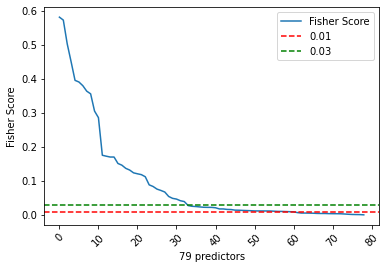

In [100]:
# Visualize the Fisher Score
plt.plot(fs_df['fisherscore'].values.squeeze())
plt.axhline(y=0.01, linestyle='dashed', color='red')
plt.axhline(y=0.03, linestyle='dashed', color='green')
plt.xticks(rotation=45)
plt.xlabel(str(fs_df.shape[0]) + ' predictors')
plt.ylabel('Fisher Score')
plt.legend(['Fisher Score', '0.01', '0.03'])
plt.show()

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Added # top vars : 30


C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

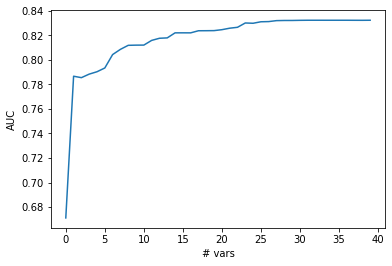

In [427]:
# Check how AUC change when add more variables: Top 40 vars
#LogisticRegression()
fs_scores = []
for i in range(1, 40+1):
    if i % 30 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = LogisticRegression()
    fs_scores.append(cross_validate(clf, trainingSet[top_n_predictors], trainingSet[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0))

# How the AUC curve looks like when adding top vars
plt.plot([s['test_score'].mean() for s in fs_scores])
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.show()

Added # top vars : 30


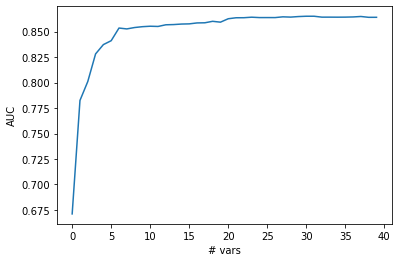

In [214]:
# Check how AUC change when add more variables: Top 40 vars
#GradientBoostingClassifier()
fs_scores = []
for i in range(1, 40+1):
    if i % 30 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = GradientBoostingClassifier()
    fs_scores.append(cross_validate(clf, trainingSet[top_n_predictors], trainingSet[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0))

# How the AUC curve looks like when adding top vars
plt.plot([s['test_score'].mean() for s in fs_scores])
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.show()

In [ ]:
#check which vars fisher score >= 0.03

In [322]:
top_fs_vars = fs_df[fs_df['fisherscore'] >= 0.03]['predictor'].values

In [323]:
len(top_fs_vars)

33

In [359]:
#Based on the fisher score >= 0.03 and AUC to select top vars

In [360]:
# LogisticRegression
top_fs_vars = fs_df['predictor'].values[:25]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 25


array(['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA', 'RNRBAVB',
       'RDVVCFL', 'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing',
       'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'RNREVNB', 'fl_RGVBRSZ_is_missing',
       'RGPKAP', 'fl_RGKBTA_is_missing', 'S001053', 'RCASHFL',
       'fl_RGPKAP_is_missing',
       'fl_cirgroep_l_is_Partners, overgenomen databanken', 'RKTFISG',
       'J002058', 'RDAGLVK', 'fl_RGFIHBR_is_missing',
       'fl_RGGWSTS_is_missing', 'RGVBRSZ'], dtype=object)

In [361]:
#LogisticRegression
features = ['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA', 'RNRBAVB',
       'RDVVCFL', 'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing',
       'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'RNREVNB', 'fl_RGVBRSZ_is_missing',
       'RGPKAP', 'fl_RGKBTA_is_missing', 'S001053', 'RCASHFL',
       'fl_RGPKAP_is_missing',
       'fl_cirgroep_l_is_Partners, overgenomen databanken', 'RKTFISG',
       'J002058', 'RDAGLVK', 'fl_RGFIHBR_is_missing',
       'fl_RGGWSTS_is_missing', 'RGVBRSZ']
target   = 'Default_12m'

In [362]:
# LogisticRegression
top_fs_vars = fs_df['predictor'].values[:20]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 20


array(['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA', 'RNRBAVB',
       'RDVVCFL', 'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing',
       'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'RNREVNB', 'fl_RGVBRSZ_is_missing',
       'RGPKAP', 'fl_RGKBTA_is_missing', 'S001053', 'RCASHFL',
       'fl_RGPKAP_is_missing',
       'fl_cirgroep_l_is_Partners, overgenomen databanken', 'RKTFISG'],
      dtype=object)

In [363]:
#GradientBoostingClassifier()
features2 = ['fl_RNREVNB_is_missing', 'RALGSCH', 'RGKBTA', 'RNKASRA', 'RNRBAVB',
       'RDVVCFL', 'fl_RBRUTTW_is_missing', 'fl_RKTFISG_is_missing',
       'RBRUTTW', 'RGTWAP', 'RACIDLQ', 'RNREVNB', 'fl_RGVBRSZ_is_missing',
       'RGPKAP', 'fl_RGKBTA_is_missing', 'S001053', 'RCASHFL',
       'fl_RGPKAP_is_missing',
       'fl_cirgroep_l_is_Partners, overgenomen databanken', 'RKTFISG']
target2   = 'Default_12m'

In [364]:
#Select models

In [365]:
logistic     = LogisticRegression()
boostedTree  = GradientBoostingClassifier()

In [366]:
models = {
          "logistic"     :logistic,
         }

In [367]:
#Train the model we select using trainingSet

In [368]:
for model in models:
    models[model].fit(trainingSet_resample[features],trainingSet_resample[target])
    print(f"{model} has been trained successfully")

logistic has been trained successfully


C:\Users\yang.zhou_ieseg.fr\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [369]:
#Calculate recall and AUC on testSet

In [370]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [516]:
predictions_logistic   = logistic.predict(testSet[features])
probabilities_logistic = DataFrame(logistic.predict_proba(testSet[features]))[1]
p_logistic = precision_score(testSet[target], predictions_logistic)
r_logistic = recall_score(testSet[target], predictions_logistic)
f1score_logistic = f1_score(testSet[target], predictions_logistic)
auc_logistic       = roc_auc_score(array(testSet[target]),array(probabilities_logistic))

In [517]:
print(p_logistic)
print(r_logistic)
print(f1score_logistic)
print(auc_logistic)

0.011615316468156315
0.8027210884353742
0.02289928197166699
0.8697527866108274


In [518]:
trainingSet["proba default logistic"] = DataFrame(logistic.predict_proba(trainingSet[features]))[1]
testSet["proba default logistic"]     = DataFrame(logistic.predict_proba(testSet[features]))[1]

In [519]:
rocTraining = roc(dataSet = trainingSet, actuals = target, probability = "proba default logistic")
rocTest     = roc(dataSet = testSet, actuals = target, probability = "proba default logistic")

Text(0.5, 1.0, 'ROC curve logistic')

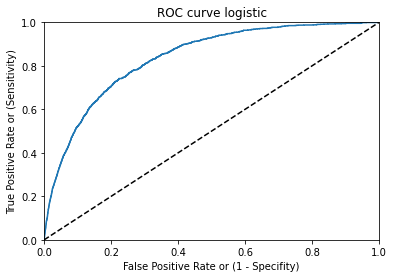

In [520]:
pyplot.plot(rocTraining["False positive rate"], rocTraining["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve logistic")

In [373]:
models2 = {
          "boostedTree"  :boostedTree,
         }

In [374]:
for model in models2:
    models2[model].fit(trainingSet_resample[features2],trainingSet_resample[target2])
    print(f"{model} has been trained successfully")

boostedTree has been trained successfully


In [523]:
predictions_boostedTree   = boostedTree.predict(testSet[features2])
probabilities_boostedTree = DataFrame(boostedTree.predict_proba(testSet[features2]))[1]
p_boostedTree = precision_score(testSet[target2], predictions_boostedTree)
r_boostedTree = recall_score(testSet[target2], predictions_boostedTree)
f1score_boostedTree = f1_score(testSet[target2], predictions_boostedTree)
auc_boostedTree       = roc_auc_score(array(testSet[target2]),array(probabilities_boostedTree))

In [524]:
print(p_boostedTree)
print(r_boostedTree)
print(f1score_boostedTree)
print(auc_boostedTree)

0.013676488872311326
0.7482993197278912
0.026862026862026864
0.8750517000693407


In [ ]:
#Calculate recall and AUC on all data set

In [510]:
predictions_logistic   = logistic.predict(fin_jobs[features])
probabilities_logistic = DataFrame(logistic.predict_proba(fin_jobs[features]))[1]
p_logistic = precision_score(fin_jobs[target], predictions_logistic)
r_logistic = recall_score(fin_jobs[target], predictions_logistic)
f1score_logistic = f1_score(fin_jobs[target], predictions_logistic)
auc_logistic       = roc_auc_score(array(fin_jobs[target]),array(probabilities_logistic))

In [511]:
print(p_logistic)
print(r_logistic)
print(f1score_logistic)
print(auc_logistic)

0.016543962088516544
0.7557989690721649
0.0323791647114031
0.840399003277072


In [512]:
A = probabilities_logistic.tolist()

In [513]:
fin_jobs["proba default boostedTree"] = A

In [514]:
rocdata = roc(dataSet = fin_jobs, actuals = target, probability = "proba default boostedTree")

Text(0.5, 1.0, 'ROC curve')

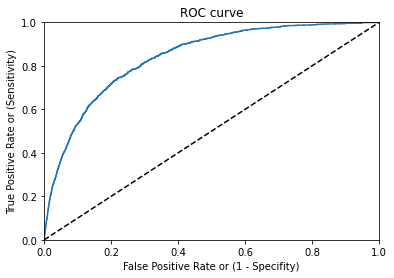

In [515]:
pyplot.plot(rocdata["False positive rate"], rocdata["True positive rate"])
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.0])
pyplot.xlabel("False Positive Rate or (1 - Specifity)")
pyplot.ylabel("True Positive Rate or (Sensitivity)")
pyplot.title("ROC curve")

In [379]:
predictions_boostedTree   = boostedTree.predict(fin_jobs[features2])
probabilities_boostedTree = DataFrame(boostedTree.predict_proba(fin_jobs[features2]))[1]
p_boostedTree = precision_score(fin_jobs[target2], predictions_boostedTree)
r_boostedTree = recall_score(fin_jobs[target2], predictions_boostedTree)
f1score_boostedTree = f1_score(fin_jobs[target2], predictions_boostedTree)
auc_boostedTree       = roc_auc_score(array(fin_jobs[target2]),array(probabilities_boostedTree))

In [380]:
print(p_boostedTree)
print(r_boostedTree)
print(f1score_boostedTree)
print(auc_boostedTree)

0.02055552531794844
0.7300257731958762
0.03998517760406557
0.8641841465947622


In [ ]:
#Make grade classification card

In [463]:
score_card = fin_jobs[features]

In [464]:
A = probabilities_logistic.tolist()

In [465]:
score_card['prob'] = A

<ipython-input-465-b536c9f960b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card['prob'] = A


In [466]:
score_card

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,RCASHFL,fl_RGPKAP_is_missing,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob
0,0.0,0.189089,0.453969,0.949511,0.693674,0.652385,0.0,1.0,0.777508,1.000000,...,1.000000,0.0,0.000167,0.306214,1.000000,0.157895,0.0,0.0,1.000000,0.004025
1,0.0,0.103454,0.000852,0.877239,0.683051,0.647382,0.0,0.0,0.644926,0.982044,...,1.000000,0.0,0.000167,0.436472,1.000000,0.342105,0.0,0.0,1.000000,0.139523
2,0.0,0.072809,0.045390,0.913412,0.682110,0.645457,0.0,1.0,0.561876,0.963149,...,0.992051,0.0,0.000167,0.306214,1.000000,0.171053,0.0,1.0,1.000000,0.084855
3,0.0,0.151825,0.045116,0.913512,0.684251,0.646577,0.0,0.0,0.604976,0.968309,...,1.000000,0.0,0.000167,0.252802,1.000000,1.000000,0.0,1.0,0.653688,0.751519
4,0.0,0.121181,0.301914,0.953628,0.682908,0.645966,0.0,1.0,0.552311,0.954083,...,0.991161,0.0,0.000167,0.306214,0.212939,0.427632,0.0,1.0,1.000000,0.553329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,1.0,0.239705,0.022090,0.911873,0.666210,0.635889,1.0,1.0,0.642390,0.965896,...,0.990277,1.0,0.000167,0.306214,0.001828,0.452120,0.0,1.0,1.000000,0.636202
44683,0.0,0.122395,0.031195,0.920005,0.688853,0.635606,1.0,1.0,0.642390,0.965896,...,0.990277,1.0,0.000167,0.306214,0.003420,0.452120,0.0,1.0,1.000000,0.356706
44684,0.0,0.062091,0.004395,0.909687,0.678278,0.651297,1.0,1.0,0.642390,0.965896,...,0.990318,1.0,0.000167,0.306214,0.002604,0.452120,0.0,1.0,1.000000,0.342970
44685,0.0,0.099766,0.161056,0.942144,0.706779,0.678038,0.0,1.0,1.000000,1.000000,...,0.993731,0.0,0.000167,0.306214,0.101525,0.452120,0.0,0.0,1.000000,0.051304


In [467]:
score_card['default'] = fin_jobs['Default_12m'].tolist()

<ipython-input-467-7ad9b675d78a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card['default'] = fin_jobs['Default_12m'].tolist()


In [468]:
score_card['ID'] = fin_jobs['ONDERNEMINGSNUMMER'].tolist()

<ipython-input-468-f7ac7a3b993d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card['ID'] = fin_jobs['ONDERNEMINGSNUMMER'].tolist()


In [469]:
score_card

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
0,0.0,0.189089,0.453969,0.949511,0.693674,0.652385,0.0,1.0,0.777508,1.000000,...,0.000167,0.306214,1.000000,0.157895,0.0,0.0,1.000000,0.004025,0,200065765
1,0.0,0.103454,0.000852,0.877239,0.683051,0.647382,0.0,0.0,0.644926,0.982044,...,0.000167,0.436472,1.000000,0.342105,0.0,0.0,1.000000,0.139523,0,200068636
2,0.0,0.072809,0.045390,0.913412,0.682110,0.645457,0.0,1.0,0.561876,0.963149,...,0.000167,0.306214,1.000000,0.171053,0.0,1.0,1.000000,0.084855,0,200305493
3,0.0,0.151825,0.045116,0.913512,0.684251,0.646577,0.0,0.0,0.604976,0.968309,...,0.000167,0.252802,1.000000,1.000000,0.0,1.0,0.653688,0.751519,0,200362210
4,0.0,0.121181,0.301914,0.953628,0.682908,0.645966,0.0,1.0,0.552311,0.954083,...,0.000167,0.306214,0.212939,0.427632,0.0,1.0,1.000000,0.553329,0,200762878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44682,1.0,0.239705,0.022090,0.911873,0.666210,0.635889,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.001828,0.452120,0.0,1.0,1.000000,0.636202,0,899988071
44683,0.0,0.122395,0.031195,0.920005,0.688853,0.635606,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.003420,0.452120,0.0,1.0,1.000000,0.356706,0,899989853
44684,0.0,0.062091,0.004395,0.909687,0.678278,0.651297,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.002604,0.452120,0.0,1.0,1.000000,0.342970,0,899991536
44685,0.0,0.099766,0.161056,0.942144,0.706779,0.678038,0.0,1.0,1.000000,1.000000,...,0.000167,0.306214,0.101525,0.452120,0.0,0.0,1.000000,0.051304,0,899992427


In [470]:
score_card.sort_values(by="prob" , ascending=False).head(20)

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
4069,1.0,1.000000,0.065976,0.228046,0.192754,0.619740,0.0,0.0,0.116646,0.965896,...,0.000167,0.515500,0.000697,0.452120,0.0,1.0,1.0,0.999471,0,435684804
345,1.0,1.000000,0.273708,0.406978,0.510391,0.630010,0.0,0.0,0.000000,0.965896,...,0.000167,0.143502,0.003868,0.452120,0.0,1.0,1.0,0.999456,0,400208934
39252,1.0,1.000000,0.060341,0.217691,0.632200,0.640963,0.0,1.0,0.000000,0.965896,...,0.000167,0.306214,0.006213,1.000000,0.0,1.0,1.0,0.999305,0,438990722
58142,1.0,0.978471,0.273708,0.861056,0.215670,0.495889,0.0,0.0,0.000000,0.965896,...,0.000167,0.143356,0.000180,0.452120,0.0,1.0,1.0,0.999248,0,451615271
111452,1.0,1.000000,0.273708,0.351244,0.339183,0.629875,0.0,0.0,0.259658,0.965896,...,0.000167,0.291515,0.000077,0.452120,0.0,1.0,1.0,0.999217,0,503968943
55634,1.0,1.000000,0.273708,0.278252,0.110954,0.550336,0.0,0.0,0.503620,0.965896,...,0.000167,0.030709,0.000001,0.452120,0.0,1.0,1.0,0.999215,0,449857195
22224,1.0,1.000000,0.273708,0.849235,0.157980,0.623803,0.0,0.0,0.000000,0.965896,...,0.000167,0.035366,0.000067,0.452120,0.0,1.0,1.0,0.999202,0,426750411
201061,1.0,1.000000,0.273708,0.899132,0.293630,0.588402,0.0,0.0,0.000000,0.965896,...,0.000167,0.015136,0.000412,0.452120,0.0,1.0,1.0,0.998964,0,846925014
178884,1.0,1.000000,0.014909,0.167494,0.332727,0.604693,0.0,0.0,0.434189,0.965896,...,0.000167,0.081648,0.000645,0.452120,0.0,1.0,1.0,0.998882,0,826284602
7653,1.0,1.000000,0.008159,0.756181,0.255318,0.590199,0.0,0.0,0.042780,0.965896,...,0.000167,0.216562,0.000437,0.452120,0.0,1.0,1.0,0.998857,0,450929046


In [471]:
#Define grade requirements

In [472]:
AAA = score_card[score_card['prob'] < 0.05]
AAA

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
0,0.0,0.189089,0.453969,0.949511,0.693674,0.652385,0.0,1.0,0.777508,1.000000,...,0.000167,0.306214,1.000000,0.157895,0.0,0.0,1.0,0.004025,0,200065765
11,0.0,0.041959,0.272810,0.986139,0.682506,0.652514,0.0,1.0,0.669627,0.982784,...,0.000167,0.306214,0.813163,0.452120,0.0,1.0,1.0,0.043597,0,201400110
15,0.0,0.073588,0.040111,0.938246,0.684040,0.654562,0.0,1.0,0.604241,0.974600,...,0.000167,0.306214,1.000000,0.302632,0.0,0.0,1.0,0.040002,0,201712587
16,0.0,0.048303,0.964683,0.994254,0.693054,0.646700,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.092531,1.000000,0.0,1.0,1.0,0.025014,0,201717438
23,0.0,0.075901,0.054327,0.933538,0.683617,0.653390,0.0,1.0,0.630081,0.980837,...,0.000167,0.306214,1.000000,0.526316,0.0,0.0,1.0,0.037112,0,202555004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44642,0.0,0.019514,0.984576,0.994809,0.912262,0.762438,0.0,1.0,0.633671,0.963222,...,0.000167,0.306214,0.015242,0.452120,0.0,1.0,1.0,0.017670,0,899845937
44650,0.0,0.006207,0.969330,0.997896,0.938860,1.000000,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.022062,0.452120,0.0,1.0,1.0,0.004521,0,899887410
44651,0.0,0.042760,0.868794,0.990911,0.733391,0.687921,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.010513,0.452120,0.0,1.0,1.0,0.020615,0,899897407
44653,0.0,0.010032,0.932783,0.995283,0.606120,0.490738,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.012366,0.452120,0.0,1.0,1.0,0.032674,0,899908590


In [473]:
AAA[AAA['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
93265,0.0,0.212221,0.581842,0.959593,0.723497,0.656931,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.009758,0.452120,0.0,1.0,1.0,0.048271,1,473622294
104254,0.0,0.087582,0.691736,0.991348,0.652730,0.645464,0.0,1.0,0.550451,0.954874,...,0.000167,0.306214,0.005160,0.092105,1.0,1.0,1.0,0.019947,1,478306802
104437,0.0,0.073519,0.824982,0.981386,0.839981,0.706330,0.0,1.0,1.000000,0.965896,...,0.000167,0.306214,0.010210,0.085526,0.0,1.0,1.0,0.015836,1,478400040
133573,0.0,0.059067,0.602113,0.961141,0.705354,0.671837,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000518,0.052632,0.0,1.0,1.0,0.040641,1,633804334
139573,0.0,0.136618,0.750405,0.989873,0.797203,0.685481,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.003052,0.059211,0.0,1.0,1.0,0.020582,1,648739958
141787,1.0,0.157921,1.000000,1.000000,0.701015,0.671942,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000003,0.452120,1.0,1.0,1.0,0.007242,1,653718533
150789,0.0,0.044180,0.494375,0.985702,0.940026,0.875711,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000916,0.157895,0.0,1.0,1.0,0.020462,1,673555330
194531,0.0,0.027644,0.517527,0.953810,0.747314,0.902097,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000772,0.452120,0.0,1.0,1.0,0.035613,1,840943082
200261,0.0,0.155307,0.840038,0.981750,0.747429,0.660427,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000940,0.006579,0.0,1.0,1.0,0.019215,1,846027268
227803,0.0,0.205304,0.879960,0.992669,0.684483,0.644910,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.005711,0.452120,0.0,1.0,1.0,0.034747,1,883511929


In [474]:
AAA['level'] = 'AAA'

<ipython-input-474-7ff2aa2b9edb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAA['level'] = 'AAA'


In [475]:
AAA

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID,level
0,0.0,0.189089,0.453969,0.949511,0.693674,0.652385,0.0,1.0,0.777508,1.000000,...,0.306214,1.000000,0.157895,0.0,0.0,1.0,0.004025,0,200065765,AAA
11,0.0,0.041959,0.272810,0.986139,0.682506,0.652514,0.0,1.0,0.669627,0.982784,...,0.306214,0.813163,0.452120,0.0,1.0,1.0,0.043597,0,201400110,AAA
15,0.0,0.073588,0.040111,0.938246,0.684040,0.654562,0.0,1.0,0.604241,0.974600,...,0.306214,1.000000,0.302632,0.0,0.0,1.0,0.040002,0,201712587,AAA
16,0.0,0.048303,0.964683,0.994254,0.693054,0.646700,1.0,1.0,0.642390,0.965896,...,0.306214,0.092531,1.000000,0.0,1.0,1.0,0.025014,0,201717438,AAA
23,0.0,0.075901,0.054327,0.933538,0.683617,0.653390,0.0,1.0,0.630081,0.980837,...,0.306214,1.000000,0.526316,0.0,0.0,1.0,0.037112,0,202555004,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44642,0.0,0.019514,0.984576,0.994809,0.912262,0.762438,0.0,1.0,0.633671,0.963222,...,0.306214,0.015242,0.452120,0.0,1.0,1.0,0.017670,0,899845937,AAA
44650,0.0,0.006207,0.969330,0.997896,0.938860,1.000000,1.0,1.0,0.642390,0.965896,...,0.306214,0.022062,0.452120,0.0,1.0,1.0,0.004521,0,899887410,AAA
44651,0.0,0.042760,0.868794,0.990911,0.733391,0.687921,1.0,1.0,0.642390,0.965896,...,0.306214,0.010513,0.452120,0.0,1.0,1.0,0.020615,0,899897407,AAA
44653,0.0,0.010032,0.932783,0.995283,0.606120,0.490738,1.0,1.0,0.642390,0.965896,...,0.306214,0.012366,0.452120,0.0,1.0,1.0,0.032674,0,899908590,AAA


In [476]:
AA = score_card[0.05 < score_card['prob']]
AA = AA[AA['prob']< 0.1]
AA

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
2,0.0,0.072809,0.045390,0.913412,0.682110,0.645457,0.0,1.0,0.561876,0.963149,...,0.000167,0.306214,1.000000,0.171053,0.0,1.0,1.0,0.084855,0,200305493
10,0.0,0.107531,0.140080,0.931106,0.682117,0.645682,1.0,0.0,0.642390,0.965896,...,0.000167,0.136952,1.000000,0.638158,0.0,1.0,1.0,0.057326,0,201400011
30,0.0,0.174110,0.073820,0.948073,0.683303,0.644710,0.0,1.0,0.603536,0.975488,...,0.000167,0.306214,1.000000,0.388158,0.0,0.0,1.0,0.087015,0,203963680
38,0.0,0.013627,0.160435,0.974883,0.683931,0.699176,0.0,1.0,0.676772,0.996162,...,0.000167,0.306214,1.000000,0.796053,0.0,1.0,1.0,0.099081,0,205097392
39,0.0,0.072626,0.000505,0.909496,0.682683,0.649919,0.0,1.0,0.634586,0.989349,...,0.000167,0.306214,1.000000,0.250000,0.0,0.0,1.0,0.070290,0,205157176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44667,0.0,0.101644,0.546378,0.984473,0.666237,0.652855,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.002091,0.452120,0.0,1.0,1.0,0.080456,0,899947786
44670,0.0,0.207480,0.490180,0.954584,0.693817,0.650357,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.015221,0.452120,0.0,1.0,1.0,0.096358,0,899964515
44677,0.0,0.095277,0.491841,0.961824,0.718370,0.690407,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.002896,0.452120,0.0,1.0,1.0,0.076412,0,899972037
44678,0.0,0.019903,0.735790,0.977151,0.620561,0.484202,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.002955,0.452120,0.0,1.0,1.0,0.065201,0,899978074


In [477]:
AA[AA['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
31657,0.0,0.015643,0.233172,0.929276,0.733282,1.000000,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.015204,0.452120,0.0,1.0,1.0,0.068991,1,433802905
62041,0.0,0.091796,0.820934,0.996148,0.695392,0.654768,0.0,1.0,0.573241,0.965896,...,0.000167,0.306214,0.001953,0.118421,0.0,1.0,1.0,0.081211,1,454160532
70884,0.0,0.000962,0.273708,0.938568,1.000000,1.000000,0.0,1.0,0.773403,1.000000,...,0.000167,0.306214,0.001978,0.452120,0.0,1.0,1.0,0.058642,1,459713385
98127,0.0,0.103545,0.024593,0.969328,0.708892,0.652417,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.669260,0.452120,0.0,1.0,1.0,0.076079,1,475754118
127427,0.0,0.045417,0.468016,0.959775,0.697424,0.713065,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000604,0.452120,0.0,1.0,1.0,0.076493,1,563512095
133225,0.0,0.162475,0.730407,0.978098,0.768825,0.675160,0.0,1.0,0.563001,0.965896,...,0.000000,0.306214,0.003707,0.452120,0.0,1.0,1.0,0.097372,1,632951625
197919,0.0,0.086185,0.625097,0.963427,0.683276,0.642469,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.001290,0.452120,0.0,1.0,1.0,0.064123,1,843613552
244502,0.0,0.087490,0.903817,0.993416,0.685451,0.644871,0.0,1.0,0.555371,0.965896,...,0.000167,0.306214,0.002916,0.452120,0.0,1.0,1.0,0.073952,1,897778154
31398,0.0,0.054143,0.389738,0.943127,0.728611,0.732227,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.005867,0.452120,0.0,1.0,1.0,0.086337,1,830229928


In [478]:
AA['level'] = 'AA'

In [479]:
A = score_card[0.1 < score_card['prob']]
A = A[A['prob']< 0.2]
A

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
1,0.0,0.103454,0.000852,0.877239,0.683051,0.647382,0.0,0.0,0.644926,0.982044,...,0.000167,0.436472,1.000000,0.342105,0.0,0.0,1.0,0.139523,0,200068636
7,1.0,0.170537,0.691610,0.981613,0.681960,0.646236,0.0,1.0,0.504950,0.949039,...,0.000167,0.306214,0.115154,0.335526,1.0,1.0,1.0,0.122624,0,201107922
8,0.0,0.108126,0.457197,0.982788,0.688785,0.654343,0.0,1.0,0.554651,0.958283,...,0.000167,0.306214,0.848416,0.894737,0.0,1.0,1.0,0.140910,0,201310929
14,0.0,0.160185,0.048249,0.919978,0.682403,0.645509,0.0,1.0,0.552706,0.957019,...,0.000167,0.306214,1.000000,0.802632,0.0,0.0,1.0,0.198184,0,201704471
17,0.0,0.145321,0.048176,0.898303,0.682922,0.646217,0.0,0.0,0.572426,0.965359,...,0.000167,0.653762,1.000000,0.671053,0.0,0.0,1.0,0.174121,0,201741786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44656,0.0,0.081650,0.262149,0.971459,0.682874,0.651284,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.003217,0.452120,0.0,1.0,1.0,0.169997,0,899915718
44658,0.0,0.070954,0.212070,0.939293,0.689419,0.673640,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.001946,0.452120,0.0,1.0,1.0,0.189139,0,899916708
44672,0.0,0.146352,0.439964,0.957289,0.678667,0.645006,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.003129,0.452120,0.0,1.0,1.0,0.125292,0,899966295
44674,0.0,0.179676,0.240658,0.947016,0.686856,0.665385,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.007006,0.452120,0.0,0.0,1.0,0.104502,0,899966988


In [480]:
A[A['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
1704,0.0,0.210160,0.321522,0.877658,0.682178,0.642939,0.0,0.0,0.567211,0.962849,...,0.000167,1.000000,0.746978,0.565789,0.0,0.0,0.130317,0.110815,1,402178232
3617,0.0,0.087948,0.928914,0.989445,0.111316,0.453959,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.001202,0.452120,0.0,1.0,1.000000,0.138300,1,404995289
4409,0.0,0.038317,0.153464,0.946415,0.728570,0.806126,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.004634,0.452120,0.0,1.0,1.000000,0.141048,1,405851463
9625,1.0,0.558403,0.369635,0.945714,0.681565,0.644060,0.0,1.0,0.564146,0.959122,...,0.000167,0.306214,1.000000,0.052632,0.0,0.0,1.000000,0.187493,1,415566113
16553,0.0,0.175072,0.321407,0.971760,0.706451,0.683755,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.002815,0.452120,0.0,1.0,1.000000,0.127418,1,422322459
17727,0.0,0.187806,0.000105,0.894023,0.679771,0.639656,0.0,0.0,1.000000,0.965896,...,0.000167,0.393975,0.526865,1.000000,0.0,0.0,1.000000,0.195530,1,423306119
41408,0.0,0.067862,0.000442,0.909022,0.723252,1.000000,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.007503,0.452120,0.0,1.0,1.000000,0.155615,1,440283988
46387,0.0,0.168064,0.083987,0.883696,0.684544,0.645167,1.0,0.0,0.642390,0.965896,...,0.000167,0.953282,0.013737,0.452120,0.0,0.0,1.000000,0.191670,1,443867644
57619,0.0,0.032774,0.035969,0.912210,0.714790,0.839949,0.0,1.0,0.839713,0.956419,...,0.000167,0.306214,0.013031,0.452120,0.0,0.0,1.000000,0.145141,1,451320610
60830,0.0,0.197632,0.002755,0.884315,0.694144,0.650306,0.0,0.0,0.675242,0.991093,...,0.000167,0.382768,1.000000,1.000000,0.0,0.0,1.000000,0.107534,1,453459162


In [481]:
A['level'] = 'A'

In [482]:
BBB = score_card[0.2 < score_card['prob']]
BBB = BBB[BBB['prob']< 0.3]
BBB

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
5,0.0,0.095644,0.158900,0.943337,0.681660,0.650215,0.0,0.0,0.559331,0.962134,...,0.000167,0.159948,1.000000,0.500000,0.0,1.0,1.0,0.240414,0,201105843
6,0.0,0.000687,0.116076,0.986586,0.681701,0.800730,0.0,1.0,0.641021,0.965896,...,0.000167,0.306214,0.128757,0.452120,0.0,1.0,1.0,0.297179,0,201107526
12,0.0,0.132449,0.207444,0.952744,0.682751,0.663937,0.0,0.0,0.589936,0.960103,...,0.000167,0.126765,1.000000,0.434211,0.0,1.0,1.0,0.256652,0,201400209
18,0.0,0.203449,0.014909,0.934030,0.685192,0.650209,0.0,0.0,0.640506,0.980433,...,0.000167,0.208267,1.000000,0.677632,0.0,0.0,1.0,0.200940,0,202239951
32,0.0,0.051234,0.376564,0.978799,0.682069,0.662584,0.0,1.0,0.635376,0.979189,...,0.000167,0.306214,0.098048,1.000000,0.0,1.0,1.0,0.202830,0,203989614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44660,0.0,0.128991,0.233130,0.935787,0.679662,0.662102,0.0,1.0,0.998570,0.965896,...,0.000167,0.306214,0.001047,0.452120,0.0,1.0,1.0,0.234062,0,899926705
44666,0.0,0.216092,0.127852,0.964301,0.684858,0.639714,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.015119,0.452120,0.0,1.0,1.0,0.299759,0,899947291
44668,0.0,0.152146,0.223667,0.948874,0.697035,0.658554,0.0,0.0,0.761178,0.965896,...,0.000167,0.294717,0.016865,0.452120,0.0,0.0,1.0,0.221417,0,899948281
44675,0.0,0.144061,0.469078,0.956123,0.696135,0.654523,0.0,0.0,0.553511,0.952892,...,0.000000,0.363848,0.017218,0.452120,0.0,0.0,1.0,0.290423,0,899967780


In [483]:
BBB[BBB['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
7411,0.0,0.200082,0.033498,0.912565,0.684237,0.643757,0.0,1.0,0.555201,0.958823,...,0.000000,0.306214,1.000000,0.381579,0.0,1.0,1.0,0.287612,1,412677887
12104,0.0,0.145390,0.005919,0.909496,0.683078,0.643699,0.0,1.0,0.596301,0.969749,...,0.000000,0.306214,1.000000,0.585526,0.0,1.0,1.0,0.229867,1,418052479
22447,0.0,0.219298,0.002061,0.909177,0.681517,0.642598,0.0,1.0,0.544535,0.956738,...,0.000167,0.306214,0.612916,0.452120,0.0,1.0,1.0,0.270507,1,426916202
33128,0.0,0.073977,0.000000,0.906991,0.682547,0.646603,1.0,0.0,0.642390,0.965896,...,0.000167,0.036385,0.072819,0.452120,0.0,0.0,1.0,0.264982,1,434879704
36915,0.0,0.051212,0.001283,1.000000,0.726940,0.690156,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.027158,0.452120,0.0,1.0,1.0,0.234136,1,437427537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25709,0.0,0.211007,0.100084,0.898467,0.691819,0.642521,0.0,1.0,0.570596,0.964278,...,0.000167,0.306214,0.007074,0.452120,0.0,0.0,1.0,0.267136,1,678921014
26067,0.0,0.051486,0.273708,0.938568,0.728481,0.838224,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.001874,0.452120,0.0,1.0,1.0,0.226183,1,684723889
38835,0.0,0.147474,0.257176,0.936780,0.652273,0.611170,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.002584,0.452120,0.0,1.0,1.0,0.273613,1,876825263
39046,0.0,0.189684,0.612459,0.962033,0.704570,0.648129,0.0,1.0,0.552941,0.965896,...,0.000167,0.306214,0.001435,0.452120,0.0,1.0,1.0,0.204436,1,877796451


In [484]:
BBB['level'] = 'BBB'

In [485]:
BB = score_card[0.3 < score_card['prob']]
BB = BB[BB['prob']< 0.4]
BB

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
20,0.0,0.159590,0.002229,0.911490,0.682049,0.644517,0.0,1.0,0.555076,0.955757,...,0.000167,0.306214,1.000000,0.677632,0.0,1.0,1.0,0.388303,0,202470177
22,0.0,0.094407,0.078162,0.933520,0.681503,0.645798,0.0,1.0,0.568371,0.960685,...,0.000167,0.306214,0.445783,1.000000,0.0,1.0,1.0,0.390822,0,202554608
26,1.0,1.000000,0.368741,0.528054,0.681006,0.642225,1.0,0.0,0.642390,0.965896,...,0.000167,0.740649,1.000000,1.000000,0.0,0.0,1.0,0.330679,0,203211040
31,0.0,0.190234,0.010567,0.893595,0.681660,0.645470,0.0,0.0,0.554921,0.957685,...,0.000167,0.279144,1.000000,0.789474,0.0,0.0,1.0,0.324525,0,203980409
35,0.0,0.166644,0.030312,0.915561,0.684442,0.647369,0.0,1.0,0.588161,0.962889,...,0.000167,0.306214,1.000000,0.552632,0.0,1.0,1.0,0.301521,0,204359994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44654,0.0,0.062182,0.059342,0.905634,0.692985,0.663582,1.0,0.0,0.642390,0.965896,...,0.000167,0.497744,0.004681,0.452120,0.0,1.0,1.0,0.352262,0,899911065
44664,0.0,0.188837,0.007970,0.945714,0.686583,0.649430,0.0,1.0,1.000000,0.965896,...,0.000167,0.306214,0.010802,0.452120,0.0,1.0,1.0,0.397411,0,899934821
44683,0.0,0.122395,0.031195,0.920005,0.688853,0.635606,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.003420,0.452120,0.0,1.0,1.0,0.356706,0,899989853
44684,0.0,0.062091,0.004395,0.909687,0.678278,0.651297,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.002604,0.452120,0.0,1.0,1.0,0.342970,0,899991536


In [486]:
BB[BB['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
1204,0.0,0.113279,0.000704,0.894224,0.687319,0.660704,0.0,0.0,0.576946,0.958069,...,0.000000,0.373308,0.684386,0.381579,0.0,0.0,1.0,0.374266,1,401341557
1434,0.0,0.069351,0.019430,0.911108,0.673805,0.697889,0.0,1.0,0.533840,0.953908,...,0.000167,0.306214,0.061983,0.452120,0.0,0.0,1.0,0.332303,1,401707385
1651,0.0,0.188654,0.254127,0.918375,0.678551,0.640815,0.0,0.0,0.545580,0.953660,...,0.000000,0.262262,0.095965,0.452120,0.0,0.0,1.0,0.360547,1,402044511
7147,0.0,0.017842,0.064946,0.914614,0.660019,0.448318,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.014806,0.452120,0.0,1.0,1.0,0.386325,1,412084407
8573,0.0,0.178324,0.061834,0.916116,0.682765,0.645167,0.0,1.0,0.560811,0.956660,...,0.000167,0.306214,0.047614,0.452120,0.0,0.0,1.0,0.387499,1,414239884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,0.0,0.207892,0.069856,0.859299,0.669653,0.630519,0.0,1.0,0.541070,0.954126,...,0.000000,0.306214,1.000000,0.203947,0.0,1.0,1.0,0.318417,1,435132397
24422,0.0,0.159292,0.045390,0.913020,0.708211,0.665038,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.004173,0.452120,0.0,1.0,1.0,0.301874,1,664578573
25327,0.0,0.142618,0.066712,0.966523,0.651721,0.632109,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000410,0.452120,0.0,1.0,1.0,0.384524,1,675621232
38617,0.0,0.225299,0.383871,0.947909,0.725993,0.672835,0.0,0.0,0.557681,0.955008,...,0.000000,0.000582,0.002942,0.452120,0.0,1.0,1.0,0.346502,1,875697093


In [487]:
BB['level'] = 'BB'

In [488]:
B = score_card[0.4 < score_card['prob']]
B = B[B['prob']< 0.5]
B

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
46,0.0,0.151825,0.064452,0.921990,0.683187,0.657214,0.0,0.0,0.629096,0.981492,...,0.000167,0.074079,1.000000,1.000000,0.0,0.0,0.355861,0.465099,0,205954655
47,1.0,0.266960,0.090316,0.953072,0.681660,0.644420,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.109146,0.452120,0.0,1.0,1.000000,0.497193,0,205970788
87,0.0,0.049860,0.056703,0.894114,0.682444,0.660563,0.0,0.0,0.576351,0.961794,...,0.000167,0.388735,0.714491,0.993421,0.0,1.0,1.000000,0.432059,0,219805958
121,0.0,0.160071,0.003154,0.860883,0.681653,0.648908,0.0,0.0,0.478170,0.944830,...,0.000167,0.268520,0.991495,0.394737,0.0,1.0,1.000000,0.492099,0,244311524
150,0.0,0.130365,0.007044,0.916672,0.678203,0.645232,0.0,1.0,0.553601,0.954144,...,0.000167,0.306214,0.344398,0.452120,0.0,1.0,1.000000,0.446583,0,267316063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44652,0.0,0.208259,0.229040,0.972178,0.683719,0.647762,0.0,1.0,0.632101,0.965896,...,0.000167,0.306214,0.011886,0.452120,0.0,1.0,1.000000,0.484107,0,899905226
44657,0.0,0.147199,0.029366,0.925752,0.689242,0.655115,1.0,0.0,0.642390,0.965896,...,0.000167,0.014263,0.042738,0.452120,0.0,1.0,1.000000,0.461070,0,899915916
44671,0.0,0.171774,0.273708,0.859991,0.685608,0.651548,1.0,0.0,0.642390,0.965896,...,0.000167,0.878620,0.006629,0.452120,0.0,1.0,1.000000,0.495741,0,899965307
44673,0.0,0.155650,0.147934,0.935195,0.697083,0.669719,0.0,1.0,0.566631,0.955990,...,0.000167,0.306214,0.064970,0.452120,0.0,0.0,1.000000,0.453796,0,899966790


In [489]:
B[B['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
1858,0.0,0.133503,0.000063,0.796261,0.681646,0.646371,0.0,0.0,0.695272,0.958129,...,0.000167,1.000000,0.070149,0.452120,0.0,0.0,1.0,0.410577,1,402465866
2368,0.0,0.218245,0.019693,0.910716,0.740352,0.691881,0.0,1.0,0.602556,0.961579,...,0.000167,0.306214,0.041985,0.256579,0.0,1.0,1.0,0.462480,1,403344311
3418,0.0,0.157963,0.271002,0.966969,0.683522,0.658650,0.0,1.0,0.560051,0.953047,...,0.000167,0.306214,0.003150,0.452120,0.0,1.0,1.0,0.421836,1,404743188
7313,0.0,0.155582,0.000074,0.906627,0.684667,0.645257,1.0,0.0,0.642390,0.965896,...,0.000167,0.045699,0.077445,0.452120,0.0,1.0,1.0,0.490898,1,412554955
10106,0.0,0.119784,0.006193,0.909842,0.701324,0.677845,0.0,1.0,0.824198,0.965896,...,0.000167,0.306214,0.007301,0.452120,0.0,1.0,1.0,0.457714,1,415988161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,0.0,0.200334,0.170192,0.891710,0.661192,0.627750,1.0,0.0,0.642390,0.965896,...,0.000167,0.653762,0.004546,0.452120,0.0,1.0,1.0,0.489496,1,652653810
24547,0.0,0.195227,0.057134,0.917819,0.703861,0.669583,0.0,1.0,0.608961,0.959079,...,0.000167,0.306214,0.002440,0.452120,0.0,1.0,1.0,0.444662,1,666476310
28266,0.0,0.202533,0.063884,0.896837,0.691369,0.648123,1.0,0.0,0.642390,0.965896,...,0.000167,0.304177,0.012048,0.452120,0.0,1.0,1.0,0.438074,1,810889613
34685,0.0,0.068801,0.273708,0.905425,0.674630,0.601441,1.0,0.0,0.642390,0.965896,...,0.000167,0.148741,0.001168,0.000000,0.0,1.0,1.0,0.480541,1,846321337


In [490]:
B['level'] = 'B'

In [491]:
CCC = score_card[0.5 < score_card['prob']]
CCC = CCC[CCC['prob']< 0.6]
CCC

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
4,0.0,0.121181,0.301914,0.953628,0.682908,0.645966,0.0,1.0,0.552311,0.954083,...,0.000167,0.306214,0.212939,0.427632,0.0,1.0,1.000000,0.553329,0,200762878
55,0.0,0.001260,0.279308,0.933183,0.680201,0.463121,0.0,1.0,0.549250,0.965896,...,0.000167,0.306214,0.032124,0.452120,0.0,1.0,1.000000,0.518636,0,207261086
64,0.0,0.140534,0.282915,0.974592,0.676867,0.647311,0.0,0.0,0.554801,0.958538,...,0.000167,0.098530,0.266392,0.125000,0.0,1.0,1.000000,0.547584,0,214014167
77,0.0,0.187188,0.005888,0.911845,0.681694,0.646159,0.0,1.0,0.578766,0.964645,...,0.000167,0.306214,1.000000,0.664474,0.0,1.0,0.127275,0.578774,0,218735790
156,0.0,0.216939,0.065966,0.967361,0.677644,0.646796,0.0,1.0,0.582141,0.960394,...,0.000167,0.306214,0.576473,1.000000,0.0,1.0,1.000000,0.527994,0,365251025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,0.0,0.227566,0.057470,0.913967,0.679471,0.639038,0.0,1.0,0.550986,0.969088,...,0.000000,0.306214,0.038612,0.703947,0.0,1.0,1.000000,0.543343,0,899817332
44640,0.0,0.224268,0.104143,0.945331,0.686256,0.657202,0.0,1.0,0.560551,0.965896,...,0.000167,0.306214,0.002548,0.452120,0.0,1.0,1.000000,0.545972,0,899836237
44644,0.0,0.227360,0.030544,0.864881,0.678981,0.641401,1.0,0.0,0.642390,0.965896,...,0.000167,0.836996,0.018121,0.452120,0.0,0.0,1.000000,0.590821,0,899865238
44662,0.0,0.170331,0.273708,0.871347,0.873991,0.647022,1.0,0.0,0.642390,0.965896,...,0.000167,0.027070,0.011493,0.452120,0.0,1.0,1.000000,0.529227,0,899929376


In [492]:
CCC[CCC['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
1380,0.0,0.209106,0.007444,0.883459,0.683508,0.642418,0.0,0.0,0.558931,0.955382,...,0.000167,0.462087,0.582405,0.664474,0.0,0.0,1.0,0.528822,1,401597222
6762,1.0,0.239797,0.442551,0.950058,0.579986,0.598054,0.0,1.0,0.535250,0.954281,...,0.000167,0.306214,0.002829,0.452120,0.0,1.0,1.0,0.563028,1,411118662
9236,0.0,0.209129,0.123846,0.898768,0.664948,0.634279,0.0,0.0,0.526110,0.952350,...,0.000167,0.342745,0.474398,0.335526,0.0,0.0,1.0,0.562967,1,415068344
12204,0.0,0.188012,0.009736,0.891546,0.689972,0.656719,0.0,0.0,0.610541,0.962768,...,0.000167,0.324116,0.032221,0.677632,0.0,0.0,1.0,0.511266,1,418159674
13117,1.0,0.436947,0.249133,0.933583,0.655416,0.623726,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000498,0.452120,0.0,1.0,1.0,0.570265,1,419055440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26026,1.0,0.317874,0.549480,0.963609,0.613218,0.614164,0.0,1.0,0.402624,0.965896,...,0.000167,0.306214,0.006281,0.452120,0.0,0.0,1.0,0.509833,1,683767846
29888,0.0,0.222551,0.150279,0.929968,0.691622,0.642927,0.0,1.0,0.565726,0.965896,...,0.000167,0.306214,0.005114,0.452120,0.0,1.0,1.0,0.561254,1,822926224
34176,0.0,0.048005,0.001798,0.909141,0.696735,0.688791,0.0,1.0,0.638206,0.965896,...,0.000167,0.306214,0.009775,0.452120,0.0,1.0,1.0,0.564595,1,843627509
34584,0.0,0.210710,0.016886,0.904906,0.686515,0.644936,1.0,0.0,0.642390,0.965896,...,0.000167,0.096056,0.001651,0.452120,0.0,1.0,1.0,0.523993,1,845798131


In [493]:
CCC['level'] = 'CCC'

In [494]:
CC = score_card[0.6 < score_card['prob']]
CC = CC[CC['prob']< 0.7]
CC

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
9,1.0,0.228757,0.023636,0.911053,0.681906,0.671942,0.0,1.0,0.559321,0.968802,...,0.000167,0.306214,0.629165,0.361842,0.0,1.0,1.000000,0.608321,0,201311226
13,0.0,0.191631,0.058732,0.928766,0.658021,0.620494,0.0,1.0,0.492665,0.947301,...,0.000167,0.306214,1.000000,0.651316,0.0,1.0,0.565054,0.660912,0,201543234
21,0.0,0.092598,0.049259,0.930824,0.679908,0.641034,0.0,0.0,0.550421,0.955738,...,0.000167,0.020375,0.669445,0.907895,0.0,1.0,1.000000,0.686802,0,202554113
128,0.0,0.153406,0.049869,0.911408,0.682983,0.646404,0.0,0.0,0.554501,0.956974,...,0.000167,0.417989,1.000000,0.598684,0.0,1.0,0.144035,0.651232,0,250610881
162,0.0,0.215909,0.084082,0.926489,0.679833,0.645567,0.0,1.0,0.556146,0.955070,...,0.000167,0.306214,0.012896,0.452120,0.0,1.0,1.000000,0.640301,0,400010875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44578,0.0,0.191860,0.068153,0.897484,0.688342,0.651059,0.0,0.0,0.588031,0.959358,...,0.000167,0.314365,0.068532,0.452120,0.0,1.0,1.000000,0.658495,0,899543851
44615,0.0,0.180638,0.099348,0.906645,0.685342,0.651445,0.0,0.0,0.565556,0.965896,...,0.000167,0.282928,0.005940,0.452120,0.0,1.0,1.000000,0.684528,0,899704001
44616,0.0,0.092598,0.273708,0.908940,0.679546,0.615439,1.0,0.0,0.642390,0.965896,...,0.000167,0.002183,0.002474,0.452120,0.0,1.0,1.000000,0.603139,0,899711127
44632,1.0,0.237140,0.002061,0.909277,0.674685,0.643628,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.001871,0.452120,0.0,1.0,1.000000,0.643340,0,899803771


In [495]:
CC[CC['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
5033,1.0,0.263181,0.033372,0.887375,0.752086,0.662636,0.0,0.0,1.000000,1.000000,...,0.000167,0.309271,0.222890,1.000000,0.0,0.0,0.56683,0.676626,1,406853533
5968,0.0,0.150108,0.004700,0.879662,0.684503,0.643905,0.0,0.0,0.601861,0.970731,...,0.000167,0.698879,0.039274,0.921053,0.0,1.0,1.00000,0.647664,1,408246571
7489,0.0,0.144863,0.109368,0.918548,0.639312,0.588641,0.0,1.0,0.490115,0.947163,...,0.000000,0.306214,0.008239,0.256579,0.0,1.0,1.00000,0.649827,1,412771523
8214,0.0,0.186020,0.007097,0.910816,0.682594,0.642862,0.0,1.0,0.561051,0.965896,...,0.000167,0.306214,0.016301,0.452120,0.0,1.0,1.00000,0.667334,1,413762606
8498,0.0,0.194723,0.107759,0.905880,0.677003,0.639887,0.0,0.0,0.543975,0.959878,...,0.000167,0.235482,0.025244,0.452120,0.0,1.0,1.00000,0.611510,1,414095374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28537,0.0,0.121135,0.002376,0.909232,0.700670,0.689422,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.004235,0.452120,0.0,1.0,1.00000,0.667029,1,811880892
28676,1.0,0.288283,0.026075,0.968527,0.684735,0.646996,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.009890,0.452120,0.0,1.0,1.00000,0.607596,1,812685202
29469,1.0,0.347304,0.380212,0.948082,0.687749,0.646732,0.0,1.0,0.554401,0.965896,...,0.000167,0.306214,0.000488,0.452120,0.0,1.0,1.00000,0.661984,1,821003941
32515,1.0,0.341945,0.046662,0.950941,0.675755,0.632348,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.006533,0.452120,0.0,1.0,1.00000,0.644142,1,835513458


In [496]:
CC['level'] = 'CC'

In [497]:
C = score_card[0.7 < score_card['prob']]
C = C[C['prob']< 0.8]
C

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
3,0.0,0.151825,0.045116,0.913512,0.684251,0.646577,0.0,0.0,0.604976,0.968309,...,0.000167,0.252802,1.000000,1.000000,0.0,1.0,0.653688,0.751519,0,200362210
103,0.0,0.113806,0.077027,0.920215,0.677610,0.636230,0.0,0.0,0.539875,0.954551,...,0.000167,0.257313,0.547136,0.947368,0.0,1.0,1.000000,0.730188,0,233605692
108,0.0,0.207434,0.272327,0.945286,0.610341,0.545597,0.0,1.0,0.522060,0.954030,...,0.000167,0.306214,0.162215,0.493421,0.0,1.0,1.000000,0.763616,0,239025519
114,0.0,0.113394,0.267070,0.942372,0.686051,0.644916,0.0,1.0,0.515280,0.949994,...,0.000167,0.306214,0.199150,1.000000,0.0,1.0,1.000000,0.727019,0,242214146
174,0.0,0.144382,0.019893,0.888158,0.673805,0.632013,0.0,0.0,0.540385,0.965896,...,0.000167,0.689419,0.005936,0.452120,0.0,1.0,1.000000,0.732306,0,400023941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44579,1.0,0.558174,0.060551,1.000000,0.676771,0.639797,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.001938,0.452120,0.0,1.0,1.000000,0.712320,0,899544049
44593,0.0,0.177065,0.058711,0.906745,0.682267,0.650061,0.0,0.0,0.577336,0.956129,...,0.000000,0.279872,0.039066,0.452120,0.0,1.0,1.000000,0.705202,0,899586908
44599,0.0,0.206175,0.058480,0.878833,0.649450,0.607024,1.0,0.0,0.642390,0.965896,...,0.000167,0.586669,0.001535,0.452120,0.0,1.0,1.000000,0.765727,0,899610959
44602,0.0,0.221703,0.030691,0.905398,0.682076,0.646745,0.0,0.0,0.569396,0.951561,...,0.000167,0.167952,0.038845,0.452120,0.0,1.0,1.000000,0.771579,0,899636594


In [498]:
C[C['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
517,0.0,0.142527,0.019451,0.891109,0.683331,0.644504,0.0,0.0,0.559846,0.957610,...,0.000167,0.444913,0.063756,0.452120,0.0,0.0,0.454762,0.735894,1,400434311
1565,0.0,0.157689,0.129072,0.920561,0.671214,0.631961,0.0,0.0,0.542075,0.965896,...,0.000167,0.010188,0.009274,0.452120,0.0,1.0,1.000000,0.735157,1,401915936
2685,1.0,0.240484,0.094596,0.901318,0.674501,0.645013,0.0,0.0,0.575161,0.968758,...,0.000167,0.637316,0.018362,0.452120,0.0,1.0,1.000000,0.707746,1,403773980
2700,0.0,0.210183,0.031490,0.903922,0.684490,0.650486,0.0,0.0,0.562411,0.958004,...,0.000000,0.135643,0.006372,0.452120,0.0,1.0,1.000000,0.711091,1,403788630
2710,0.0,0.126494,0.016423,0.893877,0.679669,0.631272,0.0,0.0,0.550426,0.957478,...,0.000167,0.468927,0.013271,0.452120,0.0,1.0,1.000000,0.701888,1,403798330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32791,0.0,0.218451,0.015508,0.927436,0.680999,0.643590,0.0,1.0,0.565556,0.965896,...,0.000167,0.306214,0.005024,0.452120,0.0,1.0,1.000000,0.744420,1,836710518
33223,0.0,0.208282,0.000021,0.902948,0.697179,0.660131,0.0,0.0,0.584336,0.965896,...,0.000167,0.087469,0.019453,0.348684,0.0,1.0,1.000000,0.704598,1,838554211
36156,0.0,0.177935,0.041815,0.895917,0.679567,0.641407,0.0,0.0,0.553991,0.952745,...,0.000167,0.403871,0.016358,0.144737,0.0,1.0,1.000000,0.711550,1,863112928
39800,1.0,0.459026,0.000768,0.909050,0.678340,0.641285,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.014779,0.452120,0.0,1.0,1.000000,0.742475,1,880941132


In [499]:
C['level'] = 'C'

In [500]:
D = score_card[score_card['prob'] > 0.8]
D

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
159,1.0,1.000000,0.067291,0.914878,0.648196,0.637331,0.0,1.0,0.531715,0.953224,...,0.000167,0.306214,0.001175,0.452120,0.0,1.0,1.0,0.954366,1,400005630
214,1.0,0.234117,0.020429,0.910798,0.678408,0.640834,0.0,1.0,0.548015,0.957478,...,0.000167,0.306214,0.360891,0.703947,0.0,1.0,1.0,0.852387,0,400077686
250,1.0,1.000000,0.089444,0.925351,0.631511,0.638606,0.0,1.0,0.000000,0.965896,...,0.000167,0.306214,0.000737,0.302632,0.0,1.0,1.0,0.992161,0,400112132
316,1.0,0.272983,0.044138,0.860091,0.686528,0.646268,0.0,0.0,0.631016,0.965896,...,0.000167,0.645903,0.021787,0.452120,0.0,1.0,1.0,0.845210,0,400180725
341,0.0,0.112775,0.273708,0.905562,0.675865,0.638316,0.0,0.0,0.545955,0.965896,...,0.000167,0.112647,0.009943,0.452120,0.0,1.0,1.0,0.815361,0,400205568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44541,1.0,0.261807,0.016896,0.897511,0.683542,0.647144,0.0,0.0,0.561661,0.959857,...,0.000167,0.168825,0.011644,0.452120,0.0,1.0,1.0,0.859045,0,899434280
44608,1.0,0.726696,0.009957,0.688126,0.682908,0.644008,1.0,0.0,0.642390,0.965896,...,0.000167,0.215980,0.001165,0.452120,0.0,1.0,1.0,0.935010,0,899677374
44655,0.0,0.223352,0.000105,0.903549,0.678087,0.647466,0.0,0.0,0.560146,0.965896,...,0.000167,0.080047,0.002154,0.690789,0.0,1.0,1.0,0.911577,0,899912451
44663,1.0,1.000000,0.378719,0.941789,0.236247,0.584545,1.0,1.0,0.642390,0.965896,...,0.000167,0.306214,0.000085,0.452120,0.0,1.0,1.0,0.874934,0,899930267


In [501]:
D[D['default'] == 1]

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,"fl_cirgroep_l_is_Partners, overgenomen databanken",RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID
159,1.0,1.000000,0.067291,0.914878,0.648196,0.637331,0.0,1.0,0.531715,0.953224,...,0.000167,0.306214,0.001175,0.452120,0.0,1.0,1.0,0.954366,1,400005630
1119,1.0,0.736957,0.047293,0.913494,0.660517,0.637190,0.0,1.0,0.520745,0.965896,...,0.000167,0.306214,0.003257,0.452120,0.0,1.0,1.0,0.942731,1,401273261
1344,1.0,0.569488,0.159615,0.923994,0.655846,0.632489,0.0,1.0,0.540170,0.965896,...,0.000167,0.306214,0.000735,0.452120,0.0,1.0,1.0,0.882607,1,401538032
1462,1.0,1.000000,0.043655,0.730245,0.181837,0.593302,0.0,0.0,0.475150,0.944310,...,0.000167,0.368651,0.084852,1.000000,0.0,0.0,1.0,0.997763,1,401746284
2068,0.0,0.220535,0.000179,0.714299,0.684565,0.647814,0.0,0.0,0.568736,0.957576,...,0.000167,0.536603,0.194324,0.703947,0.0,0.0,1.0,0.927703,1,402773001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38987,1.0,0.404104,0.008537,0.908913,0.626261,0.617963,0.0,0.0,0.496425,0.965896,...,0.000167,0.010479,0.006327,0.452120,0.0,1.0,1.0,0.988191,1,877565532
40719,1.0,0.232330,0.026801,0.899041,0.678271,0.642308,0.0,0.0,0.627526,0.965896,...,0.000167,0.246980,0.004924,0.452120,0.0,1.0,1.0,0.866094,1,884601990
40778,1.0,0.273487,0.150089,0.922191,0.584656,0.580540,0.0,1.0,0.132336,0.933395,...,0.000167,0.306214,0.005307,0.452120,0.0,1.0,1.0,0.944355,1,884947133
41068,1.0,0.798727,0.430113,0.963117,0.609475,0.595041,0.0,1.0,0.563511,0.965896,...,0.000167,0.306214,0.002348,1.000000,0.0,1.0,1.0,0.917606,1,885995327


In [502]:
D['level'] = 'D'

<ipython-input-502-de8b83a3310a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D['level'] = 'D'


In [503]:
score_card = pd.concat([AAA,AA,A,BBB,BB,B,CCC,CC,C,D])

In [504]:
score_card

,fl_RNREVNB_is_missing,RALGSCH,RGKBTA,RNKASRA,RNRBAVB,RDVVCFL,fl_RBRUTTW_is_missing,fl_RKTFISG_is_missing,RBRUTTW,RGTWAP,...,RKTFISG,J002058,RDAGLVK,fl_RGFIHBR_is_missing,fl_RGGWSTS_is_missing,RGVBRSZ,prob,default,ID,level
0,0.0,0.189089,0.453969,0.949511,0.693674,0.652385,0.0,1.0,0.777508,1.000000,...,0.306214,1.000000,0.157895,0.0,0.0,1.0,0.004025,0,200065765,AAA
11,0.0,0.041959,0.272810,0.986139,0.682506,0.652514,0.0,1.0,0.669627,0.982784,...,0.306214,0.813163,0.452120,0.0,1.0,1.0,0.043597,0,201400110,AAA
15,0.0,0.073588,0.040111,0.938246,0.684040,0.654562,0.0,1.0,0.604241,0.974600,...,0.306214,1.000000,0.302632,0.0,0.0,1.0,0.040002,0,201712587,AAA
16,0.0,0.048303,0.964683,0.994254,0.693054,0.646700,1.0,1.0,0.642390,0.965896,...,0.306214,0.092531,1.000000,0.0,1.0,1.0,0.025014,0,201717438,AAA
23,0.0,0.075901,0.054327,0.933538,0.683617,0.653390,0.0,1.0,0.630081,0.980837,...,0.306214,1.000000,0.526316,0.0,0.0,1.0,0.037112,0,202555004,AAA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44541,1.0,0.261807,0.016896,0.897511,0.683542,0.647144,0.0,0.0,0.561661,0.959857,...,0.168825,0.011644,0.452120,0.0,1.0,1.0,0.859045,0,899434280,D
44608,1.0,0.726696,0.009957,0.688126,0.682908,0.644008,1.0,0.0,0.642390,0.965896,...,0.215980,0.001165,0.452120,0.0,1.0,1.0,0.935010,0,899677374,D
44655,0.0,0.223352,0.000105,0.903549,0.678087,0.647466,0.0,0.0,0.560146,0.965896,...,0.080047,0.002154,0.690789,0.0,1.0,1.0,0.911577,0,899912451,D
44663,1.0,1.000000,0.378719,0.941789,0.236247,0.584545,1.0,1.0,0.642390,0.965896,...,0.306214,0.000085,0.452120,0.0,1.0,1.0,0.874934,0,899930267,D


In [505]:
score_card.to_csv("score_card(sum_log).csv",index=False)